## LATAR BELAKANG

Transportasi publik memiliki peran penting dalam menunjang mobilitas masyarakat di kota-kota besar, termasuk Jakarta. Salah satu moda transportasi massal yang menjadi tulang punggung mobilitas warga ibu kota adalah Transjakarta, yang mengoperasikan berbagai jenis armada seperti bus besar (BRT), bus non-BRT, hingga mikrotrans. Dengan sistem pembayaran berbasis tap-in dan tap-out menggunakan kartu, setiap perjalanan pengguna menghasilkan data transaksi yang berpotensi menjadi sumber informasi berharga.

Namun, ketersediaan data transaksi publik Transjakarta masih terbatas. Data terbuka yang tersedia umumnya hanya mencakup data dasar seperti jadwal, rute, atau informasi armada. Padahal, data transaksi dapat memberikan wawasan lebih mendalam mengenai pola perjalanan masyarakat, rute dengan tingkat kepadatan tinggi, serta efektivitas layanan transportasi. Untuk menjembatani keterbatasan tersebut, dilakukan simulasi data transaksi dengan memanfaatkan master data Transjakarta yang tersedia secara publik, lalu dipadukan dengan data buatan (dummy data) menggunakan Python.

Simulasi ini tidak hanya berfungsi sebagai sarana uji coba kerangka analisis data, tetapi juga sebagai upaya awal untuk memahami bagaimana data transaksi dapat diolah menjadi informasi strategis. Melalui analisis data semacam ini, berbagai pihak, baik peneliti, akademisi, maupun pengambil kebijakan, dapat mengeksplorasi kemungkinan peningkatan kualitas layanan transportasi publik di Jakarta.

## PERNYATAAN MASALAH

- Tingginya penggunaan TransJakarta di jam sibuk menyebabkan antrean dan kepadatan.
- Perbedaan pola penggunaan berdasarkan gender, usia, waktu, dan koridor belum dioptimalkan.
- Media pembayaran masih belum sepenuhnya terintegrasi dengan kebutuhan pengguna muda.

## URGENSI

- Optimalisasi Layanan: Data menunjukkan perbedaan signifikan pola pengguna antara weekday dan weekend, serta dominasi kelompok usia tertentu (adult & young adult). Tanpa strategi berbasis data, layanan bisa tidak efisien.
- Inklusivitas: Meski jumlah anak dan lansia relatif kecil, kebijakan transportasi publik wajib inklusif (UU/Kemenhub).
- Efisiensi Operasional: Penyesuaian headway dan kapasitas di jam puncak (misalnya 07:00 pagi weekday, sore hari tertentu) penting untuk mengurangi kepadatan.
- Pengembangan Jangka Panjang: Menjadi dasar evaluasi untuk integrasi moda transportasi dan pembangunan fasilitas pendukung.

## STAKEHOLDER

- Internal: Manajemen TransJakarta, operator bus, petugas halte.
- Eksternal: Penumpang (dewasa, remaja, lansia, anak-anak), pemerintah DKI Jakarta, bank/e-wallet provider.

## DATA UNDRESTANDING

Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini.](https://drive.google.com/drive/folders/1S04hk5uHfHYe6J1S6fVqDunuja1Lk1Lo)

In [154]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [155]:
tj = pd.read_csv('Transjakarta.csv')
tj.head(10)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
5,DDES630K2F80KC,2251412124634980,dki,Tirta Siregar,F,1993,1T,Cibubur - Balai Kota,0.0,B00127P,...,106.81632,3,2023-04-03 05:08:01,B00694P,Grand Sahid,-6.210975,106.82059,6.0,2023-04-03 05:52:25,20000.0
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,...,106.85165,25,2023-04-03 06:58:21,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,NaN,NaN,1.0,B03416P,...,106.80221,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0
8,OIHS248V7S72EB,6510013988638519,dki,"Cagak Maheswara, S.Sos",F,1992,B14,Bekasi Barat - Kuningan,1.0,B00795P,...,106.83059,1,2023-04-03 06:01:44,B01853P,Kayuringin 2,-6.245948,106.99247,16.0,2023-04-03 06:51:12,20000.0
9,ERXO372B2H63RB,3580401035990896,dki,"T. Dadap Pradana, M.Ak",M,2004,1Q,Rempoa - Blok M,0.0,B05781P,...,106.77889,15,2023-04-03 05:57:47,B06578P,Blok M Jalur 3,-6.243426,106.80188,24.0,2023-04-03 06:51:12,3500.0


note

| No | NAME | Detail |
|:---------|:-----:|-------|
| 1        | `transID`  |  Unique transaction id for every transaction |
| 2       | `payCardID`  | Customers main identifier. The card customers use as a ticket for entrance and exit.   |
| 3       | `payCardBank`  | Customers card bank issuer name|
| 4      | `payCardName`  |  Customers name that is embedded in the card.|
| 5       | `payCardSex`  | Customers sex that is embedded in the card |
| 6       | `payCardBirthDate`  | Customers birth year   |
| 7       | `corridorID`  | Corridor ID / Route ID as key for route grouping.|
| 8      | `corridorName`  | Corridor Name / Route Name contains Start and Finish for each route.|
| 9        | `direction`  |  0 for Go, 1 for Back. Direction of the route. |
| 10       | `tapInStops`  | Tap In (entrance) Stops ID for identifying stops name|
| 11       | tapInStopsName`  | Tap In (entrance) Stops Name where customers tap in|
| 12      | `tapInStopsLat`  |   Latitude of Tap In Stops|
| 13       | `tapInStopsLon`  | Longitude of Tap In Stops|
| 14       | `stopStartSeq`  | Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.  |
| 15       | `tapInTime`  | Time of tap in. Date and time|
| 16      | `tapOutStops`  | Tap Out (Exit) Stops ID for identifying stops name|
| 17       | `tapOutStopsName`  | Tap out (exit) Stops Name where customers tap out.|
| 18      | `tapOutStopsLat`  |   Latitude of Tap Out Stops|
| 19       | `tapOutStopsLon`  |Longitude of Tap Out Stops|
| 20       | `stopEndSeq`  | Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.  |
| 21       | `tapOutTime`  | Time of tap out. Date and time|
| 22      | `payAmount`  | The number of what customers pay. Some are free. Some not.|

In [156]:
tj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [157]:
display(tj.describe(),
        tj.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,FMZZ963S4B68ZP,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-06 17:35:40,P00016,BKN,2023-04-17 18:14:19
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


cek unique

In [158]:
pd.set_option('display.max_colwidth', 1)
listItem = []
for col in tj.columns:
    unique_samples = tj[col].unique()[:5]
    listItem.append([col, tj[col].nunique(), unique_samples])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                           data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah]"
4,payCardSex,2,"[M, F]"
5,payCardBirthDate,67,"[2008, 1997, 1992, 1978, 1982]"
6,corridorID,221,"[5, 6C, R1A, 11D, 12]"
7,corridorName,216,"[Matraman Baru - Ancol, Stasiun Tebet - Karet via Patra Kuningan, Pantai Maju - Kota, Pulo Gebang - Pulo Gadung 2 via PIK, Tanjung Priok - Pluit]"
8,direction,2,"[1.0, 0.0]"
9,tapInStops,2570,"[P00142, B01963P, B00499P, B05587P, P00239]"


Ukuran & Struktur Data
- Jumlah baris: 37.900 transaksi
- Jumlah kolom: 22 kolom
- Tipe data: kombinasi antara object (string), int64, dan float64.


Karakteristik Utama Dataset
- Identitas Transaksi:
- transID unik untuk tiap transaksi.
- Data Penumpang (berbasis kartu):
payCardID → identifikasi kartu.
payCardBank, payCardName, payCardSex, payCardBirthDate → data dummy pengguna.
- Data Perjalanan:
corridorID, corridorName, direction → identifikasi koridor & arah.
tapInStops, tapInStopsName, tapInStopsLat, tapInStopsLon, tapInTime → informasi naik.
tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, tapOutTime → informasi turun.
stopStartSeq, stopEndSeq → urutan halte awal/akhir.
Pembayaran: payAmount.


Kualitas Data
Distribusi unik:
- payCardID: 2000 (menunjukkan 2000 pengguna/kartu).
- corridorID: 221 koridor, corridorName: 216 nama koridor.
- tapInStops: 2570 halte unik, tapOutStops: 2230 halte unik.
- payAmount: hanya 3 nilai unik (3500, 20000, nan) → sesuai tarif Transjakarta.
- Potensi data dummy: Nama penumpang, bank, dan tanggal lahir terlihat dummy (hasil Faker).

Insight Awal
Data bisa dianalisis untuk:
1. Pola perjalanan (halte asal–tujuan).
2. Koridor sibuk vs sepi.
3. Jam sibuk (rush hour).
4. Distribusi umur/jenis kelamin pengguna.
5. Revenue simulasi berdasarkan jumlah penumpang & tarif.

- transID berisikan ID unik untuk setiap transaksi sehingga bisa dihapus/drop saja karena tidak relevan dengan analisis yang akan kita lakukan.
- kolom payCardID berisikan ID unik untuk setiap pelanggan. kolom ini seharusnya berisikan data object namun pada informasi diatas memiliki data tipe int64.
- pada kolom tapInTime dan tapOutTime tipe data masih berbentuk object dan perlu di ubah ke tipe data date and time.
- kolom tapInTime dan tapOutTime dibuatkan berdasarkan hour dan day untuk memudahkan analisis.
- kita bisa melihat dari dari table describe tidak ada data yang anomali semuanya memiliki nilai yang wajar.
- Dari unik data yang ada, dapat dilihat bahwa masih ada ketidaksesuaian jumlah unik antara corridorID dan CorridorName yang seharusnya memiliki jumlah Nunique yang sama. oleh karena perlu di cari tahu lebih lanjut.
- kategori direction bisa diganti menjadi go dan back
- perbaiki nama payCardBank

- kolom direction memiliki value data 0 dan 1. Dari penjelasannya sebagai arah rute, value data dapat diubah yaitu 0 untuk Go dan 1 untuk back.

In [159]:
tj['payCardID'] = tj['payCardID'].astype(str)

In [160]:
tj['direction'] = tj['direction'].replace({0: 'Go', 1: 'Back'})

In [161]:
tj['payCardBank'] = tj['payCardBank'].replace({'emoney': 'e-Money', 'flazz': 'Flazz', 'dki': 'JakCard', 'online': 'e-Wallet', 'brizzi': 'BRIzzi', 'bni': 'TapCash'})

## DATA CLEANING

### MISSING VALUE

Cek Duplikasi

In [162]:
d = tj.duplicated().sum()

if tj.duplicated().sum() > 0:
  print (f"Terdapat duplikasi data pada dataset :{d}")
else :
  print (f"Tidak terdapat duplikasi data pada dataset")

Tidak terdapat duplikasi data pada dataset


persentase missing value di tiap kolom

In [163]:
tj.isna().sum()/tj.shape[0]*100

,0
transID,0.000000
payCardID,0.000000
payCardBank,0.000000
payCardName,0.000000
payCardSex,0.000000
payCardBirthDate,0.000000
corridorID,3.316623
corridorName,5.092348
direction,0.000000
tapInStops,3.200528


In [164]:
trans_null = tj.isnull().sum()

missing_percentage = (tj.isnull().sum() / len(tj)) * 100

missing_info = pd.DataFrame({'Missing Values': trans_null, 'Percentage (%)': missing_percentage}).sort_values(by='Percentage (%)', ascending=False)
missing_info[missing_info['Missing Values'] > 0]

,Missing Values,Percentage (%)
tapOutStops,2289,6.039578
corridorName,1930,5.092348
tapOutStopsLat,1344,3.546174
stopEndSeq,1344,3.546174
tapOutTime,1344,3.546174
tapOutStopsLon,1344,3.546174
tapOutStopsName,1344,3.546174
corridorID,1257,3.316623
tapInStops,1213,3.200528
payAmount,1007,2.656992


> Distribusi Missing Value



Dari dataframe missing_info, terlihat bahwa kolom dengan missing terbanyak adalah **`tapOutStops'** dan **`corridorName`**, keduanya di atas 5%.
Kolom lain memiliki nilai hilang di bawah 4%, yang tergolong cukup kecil.
Tidak ada kolom yang memiliki missing value sangat ekstrem , sehingga opsi penghapusan data masih memungkinkan (dengan pertimbangan).

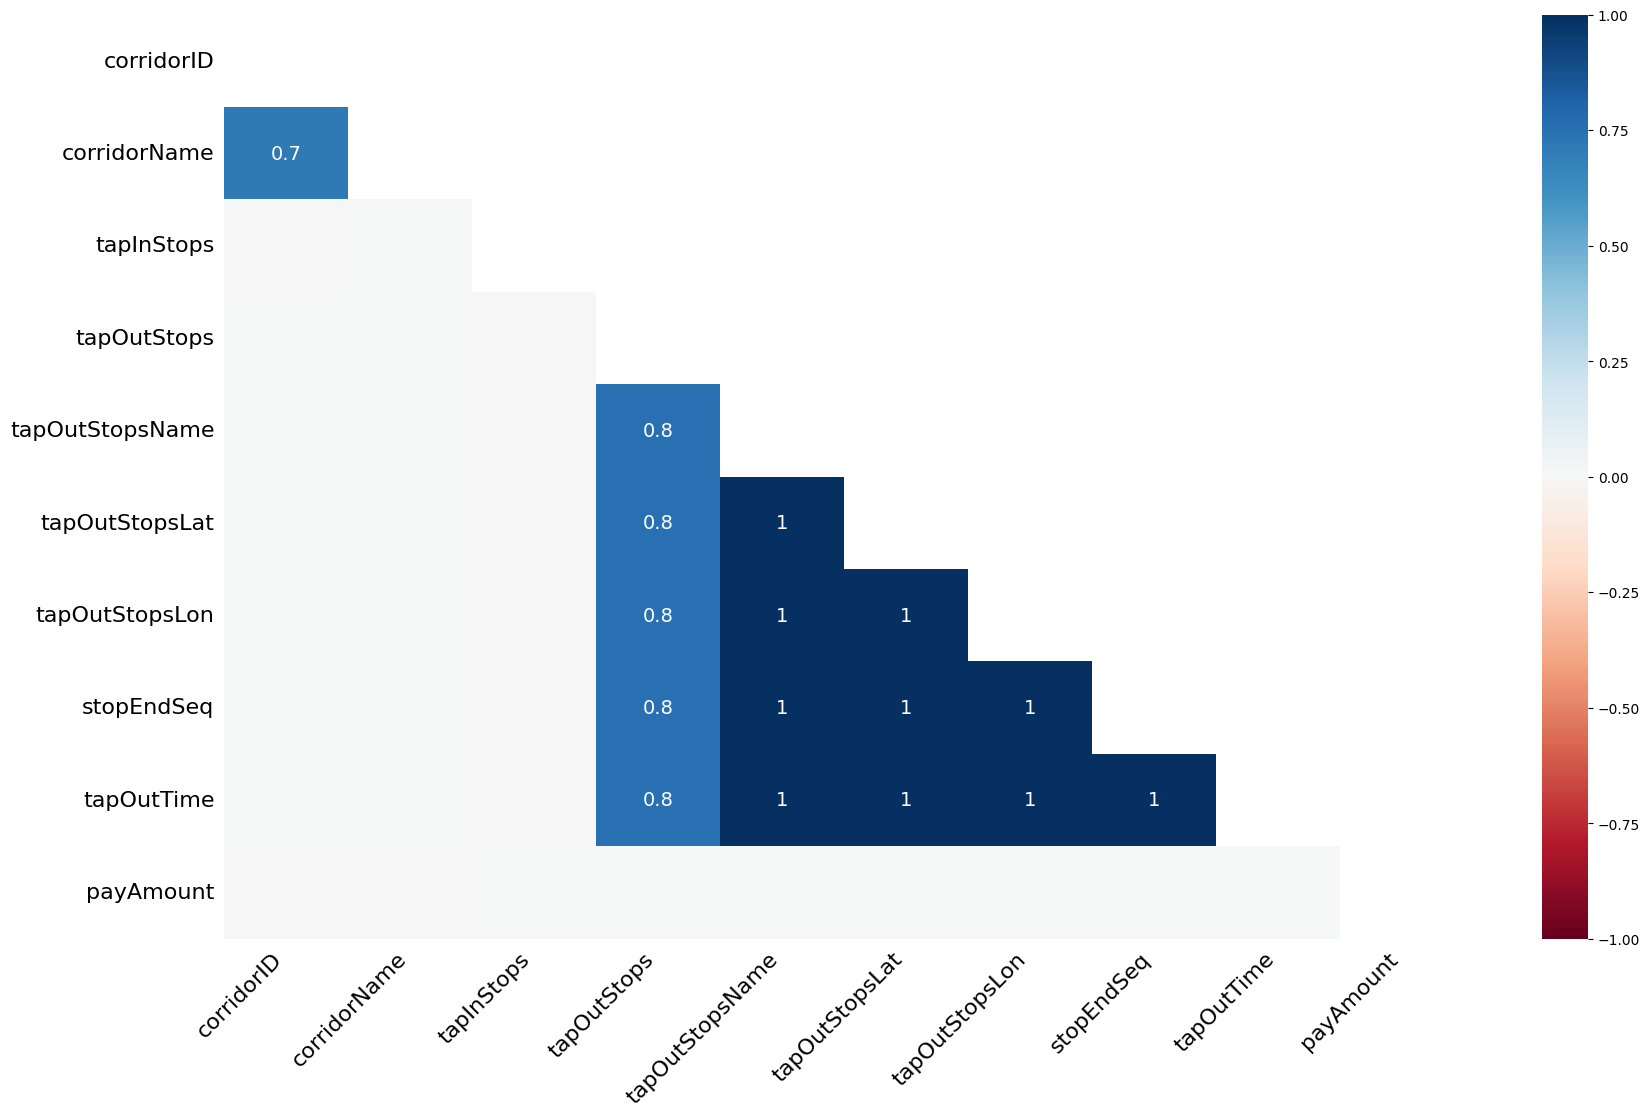

In [165]:
msno.heatmap(tj)
plt.show()

In [166]:
tj[['tapOutStops', 'tapOutStopsName','tapOutStopsLat','stopEndSeq','tapOutStopsLon','tapOutTime']].head(10)

,tapOutStops,tapOutStopsName,tapOutStopsLat,stopEndSeq,tapOutStopsLon,tapOutTime
0,P00253,Tegalan,-6.203101,12.0,106.85715,2023-04-03 06:00:53
1,B03307P,Sampoerna Strategic,-6.217152,21.0,106.81892,2023-04-03 06:40:01
2,B04962P,Simpang Kunir Kemukus,-6.133731,39.0,106.81475,2023-04-03 06:50:55
3,B03090P,Raya Penggilingan,-6.183068,29.0,106.93194,2023-04-03 06:28:16
4,P00098,Kali Besar Barat,-6.135355,15.0,106.81143,2023-04-03 06:57:03
5,B00694P,Grand Sahid,-6.210975,6.0,106.82059,2023-04-03 05:52:25
6,NaN,NaN,NaN,NaN,NaN,NaN
7,B00899P,Jln. Baros,-6.311046,12.0,106.78400,2023-04-03 07:11:43
8,B01853P,Kayuringin 2,-6.245948,16.0,106.99247,2023-04-03 06:51:12
9,B06578P,Blok M Jalur 3,-6.243426,24.0,106.80188,2023-04-03 06:51:12


In [167]:
tj[['corridorName', 'corridorID']].head(10)

,corridorName,corridorID
0,Matraman Baru - Ancol,5
1,Stasiun Tebet - Karet via Patra Kuningan,6C
2,Pantai Maju - Kota,R1A
3,Pulo Gebang - Pulo Gadung 2 via PIK,11D
4,Tanjung Priok - Pluit,12
5,Cibubur - Balai Kota,1T
6,Kalibata - Kuningan,JAK.18
7,NaN,NaN
8,Bekasi Barat - Kuningan,B14
9,Rempoa - Blok M,1Q




> Hasil Analisis




- `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, dan `tapOutTime` punya pola missing yang saling terkait :  jika satu kolom kosong (misalnya tapOutStopsName), maka kemungkinan besar kolom lain di kelompok ini juga kosong. Hal ini logis, karena semuanya terkait dengan informasi “tap out” (pemberhentian akhir).

- `corridorName` dan `corridorID` juga punya hubungan missing yang cukup tinggi. Kalau `corridorName` kosong, biasanya `corridorID` juga kosong.

- Kolom `payAmount` missing secara independen, kemungkinan ada error input atau transaksi tertentu yang tidak tercatat nominalnya.


Rekomendasi Penanganan Missing Value

- Kelompok `tap out` (`tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime`)
Karena missing value ini kemungkinan besar berarti user tidak melakukan tap out, maka bisa:
Mengisi dengan label khusus, misalnya "No Tap Out" atau NaN → 0. Atau tetap dibiarkan kosong, lalu diperlakukan sebagai kategori tersendiri dalam analisis atau bisa di drop

- `CorridorName` & `CorridorID`
Karena keduanya saling berkaitan, bisa mengisi missing value salah satu dengan data dari kolom pasangannya (jika tersedia).
Jika keduanya kosong, bisa dibiarkan atau diisi "Unknown" atau bisa di drop

- `PayAmount`
Untuk data numerik, cara paling umum:
Gunakan median (lebih aman jika ada outlier).
Atau 0 jika benar-benar tidak ada transaksi.
Bisa juga melakukan cross-check dengan data perjalanan (jika tap in dan tap out tersedia, tarif mungkin bisa dihitung).
Penghapusan data



### HANDLING MISSING VALUE

#### TAPOUTSTOP, TAPOUTSTOPSNAME, TAPOUTSTOPLAT, TAPOUTSTOPSLON, STOPEND SEQ, TAPOUTTIME

In [168]:
tj[["tapOutStops", "tapOutStopsName","tapOutStopsLat","tapOutStopsLon","stopEndSeq","tapOutTime"]].head(10)

,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime
0,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53
1,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01
2,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55
3,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16
4,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03
5,B00694P,Grand Sahid,-6.210975,106.82059,6.0,2023-04-03 05:52:25
6,NaN,NaN,NaN,NaN,NaN,NaN
7,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43
8,B01853P,Kayuringin 2,-6.245948,106.99247,16.0,2023-04-03 06:51:12
9,B06578P,Blok M Jalur 3,-6.243426,106.80188,24.0,2023-04-03 06:51:12


In [169]:
tapout_cols = [
    'tapOutStops','tapOutStopsName','tapOutStopsLat',
    'tapOutStopsLon','stopEndSeq','tapOutTime'
]

tapOutStops & tapOutStopsName dibersihkan: hapus spasi berlebih, strip, ubah 'nan'/'None'/'' ke NaN.

In [170]:
for c in ['tapOutStops','tapOutStopsName']:
    tj[c] = (tj[c].astype(str)
                 .str.replace(r'\s+', ' ', regex=True)
                 .str.strip()
                 .replace({'nan': pd.NA, 'None': pd.NA, '': pd.NA}))


tapOutTime dikonversi ke datetime (errors='coerce' → nilai tidak valid jadi NaT)

In [171]:
tj['tapOutTime'] = pd.to_datetime(tj['tapOutTime'], errors='coerce')

Kalau semua kolom paket tapOut (tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime) kosong → baris di-drop karena baris ini benar-benar tidak punya informasi tujuan tap-out

Jika ada minimal 1 kolom kosong dalam paket (contoh lat/lon kosong tapi name ada), baris juga di-drop karena keenam kolom ini saling terkait; mengisi sebagian akan memecah konsistensi ID–Nama–Koordinat–Urutan–Waktu

In [172]:
mask_all_missing = tj[tapout_cols].isna().all(axis=1)
tj = tj.loc[~mask_all_missing].copy()

mask_partial = tj[tapout_cols].isna().any(axis=1)
tj = tj.loc[~mask_partial].copy()

In [173]:
tj[["tapOutStops", "tapOutStopsName","tapOutStopsLat","tapOutStopsLon","stopEndSeq","tapOutTime"]].isna().sum()

,0
tapOutStops,0
tapOutStopsName,0
tapOutStopsLat,0
tapOutStopsLon,0
stopEndSeq,0
tapOutTime,0


#### CORRIDORID DAN CORRIDORNAME

##### HANDLING UNIQ CORRIDORID DAN CORRIDORNAME

In [174]:
tj[["corridorName","corridorID"]].nunique()

,0
corridorName,216
corridorID,221


> Dari unik data yang ada, dapat dilihat bahwa masih ada ketidaksesuaian jumlah unik antara corridorID dan CorridorName yang seharusnya memiliki jumlah Nunique yang sama.

mapping corridorID ke corridorName

In [175]:
mappingID = (
    tj.groupby("corridorID")["corridorName"]
    .agg(lambda x: x.mode()[0])
    .to_dict()
)

tj["corridorName"] = tj["corridorID"].map(mappingID)

In [176]:
mappingName = (
    tj.groupby("corridorName")["corridorID"]
    .agg(lambda x: x.mode()[0])
    .to_dict()
)

tj["corridorID"] = tj["corridorName"].map(mappingName)

In [177]:
tj[["corridorName","corridorID"]].nunique()

,0
corridorName,216
corridorID,216


##### HANDLING MISSING VALUE CORRIDORID DAN CORRIDORNAME

In [178]:
tj[["corridorID", "corridorName"]].isna().sum()

,0
corridorID,1171
corridorName,1171


In [179]:
tj[['corridorID','corridorName']].head(10)


,corridorID,corridorName
0,5,Matraman Baru - Ancol
1,6C,Stasiun Tebet - Karet via Patra Kuningan
2,R1A,Pantai Maju - Kota
3,11D,Pulo Gebang - Pulo Gadung 2 via PIK
4,12,Tanjung Priok - Pluit
5,1T,Cibubur - Balai Kota
7,NaN,NaN
8,B14,Bekasi Barat - Kuningan
9,1Q,Rempoa - Blok M
10,5M,Kampung Melayu - Tanah Abang via Cikini


Karena setelah “uniquefication” keduanya missing = 1257, sangat mungkin 1257 baris itu adalah baris yang sama (both NaN). Jadi untuk melakukan mapping tidak bisa mengisi karena tidak ada pasangan referensi.

ada 2 option yang dapat di pilih :
- Kalau < 5%, aman di-drop.
- Kalau > 10%, sebaiknya jangan dibuang dulu → bisa diganti dengan "Unknown" / -1.

In [180]:
# Hitung proporsi missing
total_rows = len(tj)
missing_corridor = tj[["corridorID", "corridorName"]].isna().all(axis=1).sum()
proporsi_missing = (missing_corridor / total_rows) * 100

if proporsi_missing < 5:
    tj = tj.dropna(subset=["corridorID", "corridorName"])
    print("Missing value di-drop karena <5%")
else:
    tj[["corridorID", "corridorName"]] = tj[["corridorID", "corridorName"]].fillna({"corridorID": -1, "corridorName": "Unknown"})
    print("Missing value diganti placeholder karena >=5%")

Missing value di-drop karena <5%


yang terbaik adalah **drop** baris yang corridorID & corridorName sama-sama kosong.
Alasannya:
- Baris tersebut tidak punya informasi penting → tidak bisa dipetakan ke rute manapun.
- Kalau diisi “Unknown”, malah bisa bikin analisis bias (seolah ada rute baru bernama “Unknown”).

In [181]:
tj[["corridorID", "corridorName"]].isna().sum()

,0
corridorID,0
corridorName,0


#### MISSING VALUE TAPINSTOPS

Kalau tapInStops kosong → artinya kita tidak tahu di halte mana penumpang naik.
Data seperti ini biasanya dianggap tidak valid untuk analisis rute, sehingga lebih baik di-drop daripada diisi dengan nilai “karangan” (mode/median).

In [182]:
tj['tapInStops'] = (tj['tapInStops']
                    .astype(str)
                    .str.strip()
                    .replace({'nan': pd.NA, 'None': pd.NA, '': pd.NA}))

Normalisasi kolom tapInStops
Semua nilai dikonversi ke string.
Spasi berlebih dihapus (strip).
Nilai 'nan', 'None', atau string kosong diganti jadi NaN.
→ Tujuannya biar deteksi missing value konsiste

In [183]:
tj['tapInStops'].isna().sum()

np.int64(1115)

In [184]:
tj = tj.dropna(subset=['tapInStops'])

In [185]:
tj["tapInStops"].isna().sum()

np.int64(0)

#### MISSING VALUE PAYAMOUNT

In [186]:
pd.crosstab(tj['corridorID'], tj['payAmount'])

payAmount,0.0,3500.0,20000.0
corridorID,,,
1,0,276,0
10,0,93,0
10A,131,0,0
10B,116,0,0
10D,0,153,0
...,...,...,...
S21,0,355,0
S22,0,126,0
S31,0,0,141


In [187]:
tmp = tj[tj['payAmount'] > 0].copy()

In [188]:
mode_pay = (tmp.groupby('corridorID')['payAmount']
              .agg(lambda s: s.mode().iat[0] if not s.mode().empty else None))

In [189]:
id_20000 = set(mode_pay[mode_pay == 20000].index)
id_3500  = set(mode_pay[mode_pay == 3500].index)

print("Koridor 20.000:", sorted(id_20000))
print("Koridor 3.500 :", sorted(id_3500))

Koridor 20.000: ['1K', '1T', '6P', 'B13', 'B14', 'D31', 'D32', 'S12', 'S31', 'T21']
Koridor 3.500 : ['1', '10', '10D', '10H', '10K', '11', '11D', '11Q', '12', '12A', '12B', '12H', '12P', '13', '13B', '13C', '13D', '14', '1A', '1B', '1C', '1E', '1F', '1H', '1M', '1N', '1P', '1Q', '1R', '2', '2A', '2B', '2P', '2Q', '3E', '3F', '4', '4B', '4C', '4D', '4F', '5', '5B', '5C', '5D', '5F', '5M', '5N', '6', '6A', '6B', '6C', '6D', '6H', '6M', '6N', '6Q', '6T', '6U', '6V', '7', '7A', '7B', '7C', '7D', '7E', '7F', '7P', '7Q', '8', '8A', '8C', '8D', '8E', '8K', '8M', '9A', '9C', '9D', '9E', '9H', '9N', 'B11', 'B21', 'D11', 'D21', 'JIS3', 'L13E', 'M10', 'M11', 'M12', 'M13', 'M3', 'M4', 'M6', 'M7', 'M8', 'M9', 'R1A', 'S11', 'S21', 'S22', 'T11']


Mendefinisikan koridor ber-tarif tetap

In [190]:
mask = tj['payAmount'].isna()
tj.loc[mask, 'payAmount'] = tj.loc[mask].apply(
    lambda r: 20000.0 if r['corridorID'] in id_20000
    else (3500.0 if r['corridorID'] in id_3500 else 0.0),
    axis=1
)

In [191]:
tj['payAmount'].isna().sum()

np.int64(0)

In [192]:
tj[['payAmount','corridorID']]

,payAmount,corridorID
0,3500.0,5
1,3500.0,6C
2,3500.0,R1A
3,3500.0,11D
4,3500.0,12
...,...,...
37895,3500.0,6B
37896,3500.0,9N
37897,20000.0,1T
37898,0.0,JAK.13


## MODIFIKASI KATEGORI

### WAKTU

Berdasarkan hasil analisis data sebelumnya, ditemukan bahwa kolom tapInTime dan tapOutTime memiliki tipe data berupa object yang perlu diubah ke format datetime. Selain itu, untuk mendukung analisis yang lebih mendalam berdasarkan aspek waktu, informasi tanggal dan waktu akan dipecah menjadi komponen jam, hari, dan minggu. Berikut adalah modifikasi yang dilakukan pada data waktu:

In [193]:
tj['tapInTime'] = pd.to_datetime(tj['tapInTime'])
tj['tapOutTime'] = pd.to_datetime(tj['tapOutTime'])

In [194]:
tj['hour'] = tj['tapInTime'].dt.hour
tj['hour'] = tj['tapOutTime'].dt.hour

Week

In [195]:
tj['dayOfWeek'] = tj['tapInTime'].dt.dayofweek

dayOfWeek = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
tj['dayOfWeek'] = tj['dayOfWeek'].map(dayOfWeek)

weekday / weekend

In [196]:
tj['dayType'] = tj['dayOfWeek'].apply(lambda x: 'Weekend' if x in ['Saturday','Sunday'] else 'Weekday')

rush hour

In [197]:
def is_rush_trip(row):
    if pd.isna(row['tapInTime']) or pd.isna(row['tapOutTime']):
        return 'Unknown'

    start = row['tapInTime'].hour
    end   = row['tapOutTime'].hour

    if start >= 6  and end <= 9:
        return 'Morning Peak Hour'
    elif start >= 16 and end <= 21:
        return 'Evening Peak Hour'
    else:
        return 'Non Peak Hour'


tj['rushHour'] = tj.apply(is_rush_trip, axis=1)

### Jarak Perjalanan

In [198]:
tj['tapInStopsLat'] = pd.to_numeric(tj['tapInStopsLat'], errors='coerce')
tj['tapInStopsLon'] = pd.to_numeric(tj['tapInStopsLon'], errors='coerce')
tj['tapOutStopsLat'] = pd.to_numeric(tj['tapOutStopsLat'], errors='coerce')
tj['tapOutStopsLon'] = pd.to_numeric(tj['tapOutStopsLon'], errors='coerce')

In [199]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

In [200]:
tj['tripDistance'] = haversine(
    tj['tapInStopsLat'], tj['tapInStopsLon'],
    tj['tapOutStopsLat'], tj['tapOutStopsLon']
)

Trip Duration

In [201]:
tj['tripDuration'] = tj['tapOutTime'] - tj['tapInTime']

In [202]:
tj['tripDuration_str'] = tj['tripDuration'].apply(
    lambda x: str(x).split()[2] if pd.notna(x) and 'days' in str(x) else str(x)
)

### KATEGORI UMUR

Memastikan berbentuk numeric

In [203]:
tj['birthYear'] = pd.to_numeric(tj['payCardBirthDate'], errors='coerce')

In [204]:
ref_year = 2023
tj['age'] = (ref_year - tj['birthYear']).astype('Int64')

In [205]:
def age_group(age):
    if pd.isnull(age):
        return 'Unknown'
    elif age < 18:
        return 'Child'
    elif age < 30:
        return 'Young Adult'
    elif age < 50:
        return 'Adult'
    else:
        return 'Senior'

tj['ageGroup'] = tj['age'].apply(age_group)

In [206]:
tj[['tripDuration', 'tripDistance', 'tapInTime','tapOutTime','dayOfWeek','dayType','rushHour','payCardBirthDate','age', 'ageGroup']]

,tripDuration,tripDistance,tapInTime,tapOutTime,dayOfWeek,dayType,rushHour,payCardBirthDate,age,ageGroup
0,0 days 00:39:09,2.514901,2023-04-03 05:21:44,2023-04-03 06:00:53,Monday,Weekday,Non Peak Hour,2008,15,Child
1,0 days 00:57:17,2.019437,2023-04-03 05:42:44,2023-04-03 06:40:01,Monday,Weekday,Non Peak Hour,1997,26,Young Adult
2,0 days 00:51:49,0.079950,2023-04-03 05:59:06,2023-04-03 06:50:55,Monday,Weekday,Non Peak Hour,1992,31,Adult
3,0 days 00:43:25,1.456398,2023-04-03 05:44:51,2023-04-03 06:28:16,Monday,Weekday,Non Peak Hour,1978,45,Adult
4,0 days 00:39:28,8.721936,2023-04-03 06:17:35,2023-04-03 06:57:03,Monday,Weekday,Morning Peak Hour,1982,41,Adult
...,...,...,...,...,...,...,...,...,...,...
37895,0 days 01:37:12,10.460846,2023-04-21 18:18:37,2023-04-21 19:55:49,Friday,Weekday,Evening Peak Hour,2004,19,Young Adult
37896,0 days 00:35:51,0.581609,2023-04-18 21:52:31,2023-04-18 22:28:22,Tuesday,Weekday,Non Peak Hour,1974,49,Adult
37897,0 days 02:57:38,19.255109,2023-04-04 10:29:47,2023-04-04 13:27:25,Tuesday,Weekday,Non Peak Hour,1976,47,Adult
37898,0 days 00:28:24,0.201384,2023-04-15 19:59:26,2023-04-15 20:27:50,Saturday,Weekend,Evening Peak Hour,1976,47,Adult


## DATA ANALYSIS

### 1. Bagaimana Proporsi pengguna Transjakarta berdasarkan Gender?

In [207]:
gender_count = tj['payCardSex'].value_counts().reset_index()
gender_count

,payCardSex,count
0,F,17740
1,M,15585


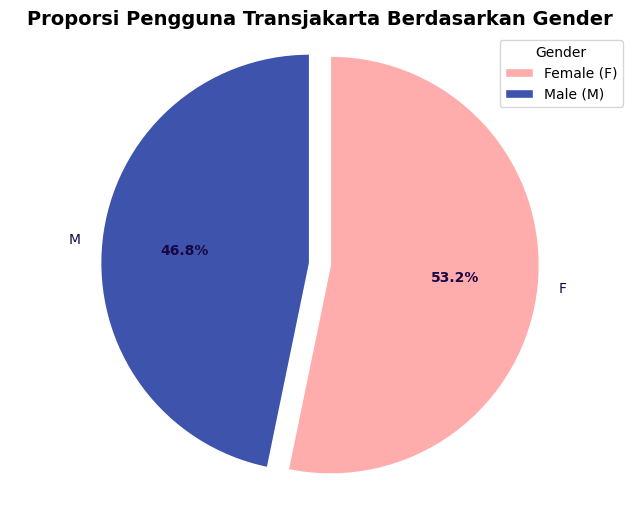

In [208]:
plt.figure(figsize=(8,6))
wedges, texts, autotexts = plt.pie(
    gender_count['count'],
    labels=gender_count['payCardSex'],
    autopct='%1.1f%%',
    colors=['#FFACAC','#3E54AC'],
    startangle=90,
    counterclock=False,
    explode=[0.1,0],
    wedgeprops={'linewidth':1, 'edgecolor':'white'},
    textprops={'color':'#170845', 'fontsize':10}
)

for autotext in autotexts:
    autotext.set_fontweight('bold')

plt.axis('equal')
plt.legend(['Female (F)', 'Male (M)'], title="Gender", loc='upper right')
plt.title('Proporsi Pengguna Transjakarta Berdasarkan Gender', fontsize=14, fontweight='bold')
plt.show()


Diagram pie di atas menunjukkan proporsi penumpang Transjakarta berdasarkan gender dari kolom 'payCardSex'.

> Penumpang wanita tercatat lebih banyak, dengan selisih 6,6% dibandingkan pria. Meski perbedaannya kecil, data ini mendukung relevansi kebijakan Transjakarta dalam menyediakan armada khusus wanita untuk meningkatkan rasa aman dan kenyamanan.




Koridor mana yang sering digunakan pengguna wanita ?

In [209]:
female = tj[tj['payCardSex'] == 'F']
corridor_female = female['corridorName'].value_counts().reset_index()
corridor_female=corridor_female.sort_values(by='count', ascending=False).head(5)
corridor_female

,corridorName,count
0,Pasar Minggu - Tanah Abang,209
1,Poris Plawad - Bundaran Senayan,199
2,Rusun Rawa Bebek - Kodamar,199
3,Terminal Tanah Merah - Pulo Gadung,186
4,Cilangkap - Cililitan,184


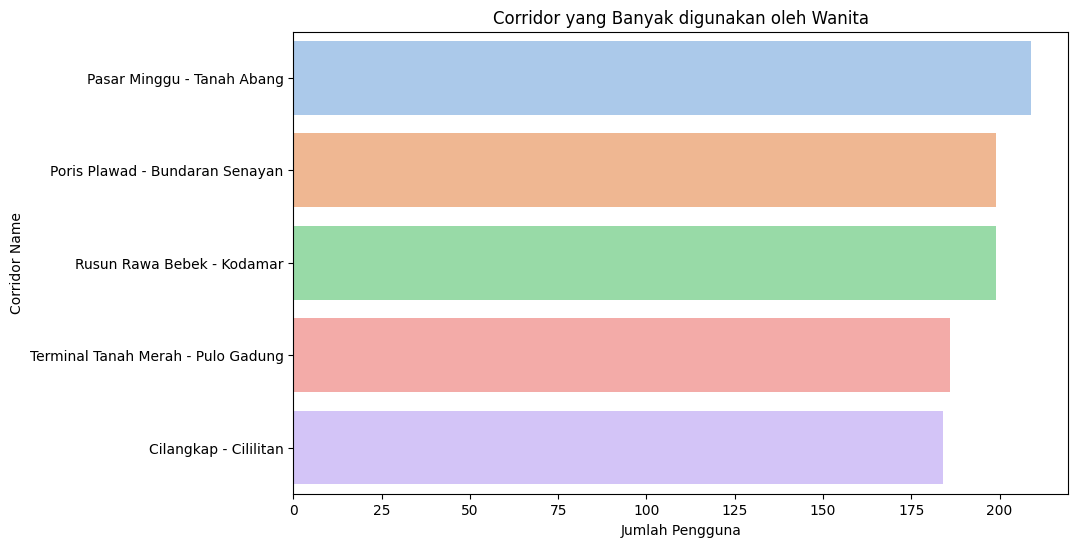

In [210]:
plt.figure(figsize=(10, 6))
sns.barplot(data=corridor_female, y='corridorName', x='count', hue=corridor_female['corridorName'].value_counts().index, palette='pastel')
plt.title('Corridor yang Banyak digunakan oleh Wanita')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Corridor Name')
plt.show()


> Berdasarkan hasil eksplorasi data pengguna Transjakarta, diperoleh gambaran distribusi pengguna berdasarkan jenis kelamin. Dari total data, jumlah pengguna perempuan tercatat sebanyak 20.157 orang (≈ 53,2%), sedangkan pengguna laki-laki sebanyak 17.743 orang (≈ 46,8%). Hal ini menunjukkan bahwa perempuan sedikit lebih mendominasi penggunaan layanan Transjakarta dibandingkan laki-laki. Visualisasi pie chart memperlihatkan proporsi ini secara lebih jelas, dengan bagian perempuan lebih besar dibandingkan laki-laki.

analisis lebih mendalam terhadap koridor yang paling sering digunakan oleh pengguna perempuan. Dari hasil perhitungan, terdapat lima koridor utama yang menempati posisi teratas, yaitu:

1. Dari data terlihat bahwa koridor Pasar Minggu – Tanah Abang menjadi koridor dengan jumlah pengguna wanita terbanyak. Hal ini cukup logis karena Tanah Abang merupakan pusat perbelanjaan dan area kerja, sehingga banyak wanita menggunakan jalur ini untuk mobilitas sehari-hari.
2. Poris Plawad – Bundaran Senayan juga menempati urutan tinggi. Koridor ini melewati area perkantoran dan pusat bisnis (Senayan), yang memang padat pekerja.
3. Sementara itu, Rusun Rawa Bebek – Kodamar serta Terminal Tanah Merah – Pulo Gadung mengindikasikan adanya kebutuhan akses transportasi bagi warga rusun dan kawasan perumahan menuju pusat aktivitas.
4. Cilangkap – Cililitan melengkapi lima besar, yang juga menunjukkan jalur penghubung kawasan pemukiman ke area terminal besar (Cililitan).

> Visualisasi bar chart menampilkan peringkat ini dengan jelas, dimana koridor Pasar Minggu – Tanah Abang menjadi jalur dengan pengguna wanita terbanyak. Hal ini dapat diinterpretasikan bahwa jalur-jalur yang menghubungkan kawasan hunian dengan pusat perdagangan, perkantoran, maupun terminal besar cenderung memiliki tingkat penggunaan lebih tinggi di kalangan perempuan.

### 2. Bagaimana Distribusi Pengguna Transjakarta berdasarkan Usia?

Menghitung jumlah per kategori usia

In [211]:
ageGroup_count = tj.groupby('payCardName')['ageGroup'].value_counts().reset_index(name='count')

ageGroup_counts = ageGroup_count['ageGroup'].value_counts().reset_index()
ageGroup_counts

,ageGroup,count
0,Adult,927
1,Young Adult,508
2,Child,293
3,Senior,234


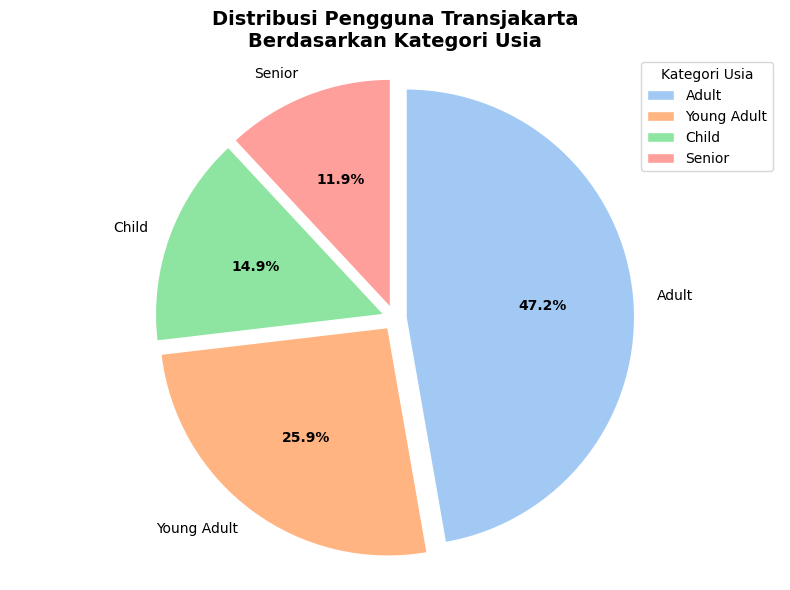

In [212]:
plt.figure(figsize=(8,6))

# explode untuk memberi jarak tiap slice
explode = [0.05] * len(ageGroup_counts)

# pie chart dengan donut style
wedges, texts, autotexts = plt.pie(
    ageGroup_counts['count'],
    labels=ageGroup_counts['ageGroup'],
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    startangle=90,
    counterclock=False,
    explode=explode,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'color':"black", 'fontsize':10}
)

# styling teks persentase
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

plt.axis('equal')
plt.legend(ageGroup_counts['ageGroup'], title="Kategori Usia", loc='upper right')
plt.title('Distribusi Pengguna Transjakarta\nBerdasarkan Kategori Usia', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


Berikut hasil data :
Distribusi kategori usia (berdasarkan perjalanan/uses):


1. kategori usia dewasa, mencakup 47.2,4% dari total transaksi. Hal ini wajar karena kelompok usia dewasa termasuk usia produktif, sehingga lebih sering menggunakan Transjakarta dibandingkan kelompok usia lainnya.
2. Kelompok usia remaja dengan 25.9%
3. kategori lansia mencatatkan proporsi terkecil.


Proporsi Gender berdasarkan Kelompok Usia Pengguna Transjakarta

In [213]:
age_gender= tj.groupby(['payCardSex', 'ageGroup']).size().reset_index(name='count')
age_gender


,payCardSex,ageGroup,count
0,F,Adult,8331
1,F,Child,3053
2,F,Senior,1025
3,F,Young Adult,5331
4,M,Adult,7919
5,M,Child,1713
6,M,Senior,2600
7,M,Young Adult,3353


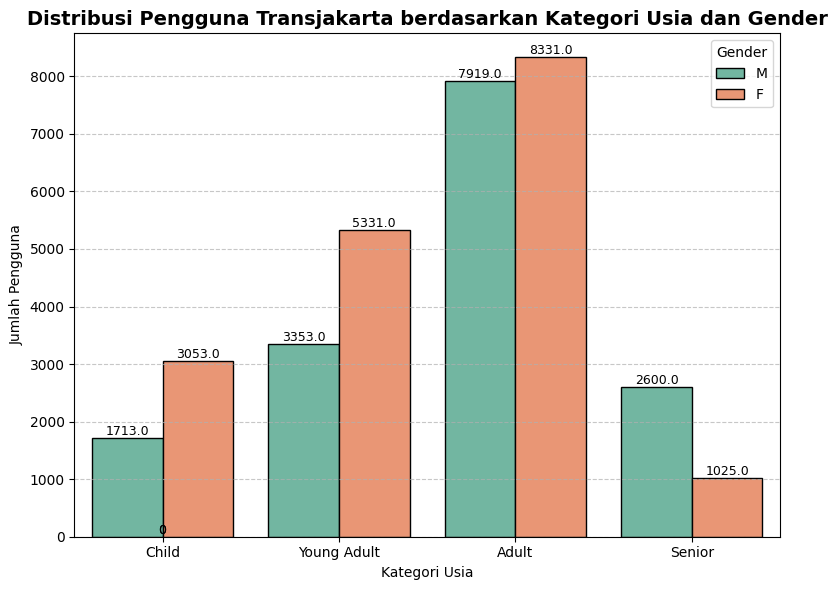

In [214]:
plt.figure(figsize=(8,6))
ax = sns.countplot(
    data=tj,
    x='ageGroup',
    hue='payCardSex',
    palette='Set2',
    edgecolor='black'
)

# Tambahkan label count di atas batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom', fontsize=9, color='black')

plt.title('Distribusi Pengguna Transjakarta berdasarkan Kategori Usia dan Gender', fontsize=14, fontweight='bold')
plt.xlabel('Kategori Usia')
plt.ylabel('Jumlah Pengguna')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()


Berdasarkan grafik distribusi pengguna Transjakarta berdasarkan kategori usia dan gender, diperoleh hasil bahwa kelompok usia **dewasa/Adult** mendominasi dengan proporsi terbesar, yaitu lebih dari setengah total pengguna. Hal ini sesuai dengan karakteristik pengguna transportasi publik yang umumnya berada pada usia produktif dan memiliki mobilitas tinggi, baik untuk bekerja, kuliah, maupun aktivitas harian lainnya.

Kelompok usia **remaja/Young Adult** menempati posisi kedua dengan proporsi cukup signifikan. Pada kategori ini, terlihat bahwa pengguna perempuan sedikit lebih dominan dibandingkan laki-laki. Hal ini dapat dihubungkan dengan pola mobilitas remaja, khususnya pelajar dan mahasiswa, yang sering memanfaatkan transportasi publik sebagai sarana utama menuju sekolah atau kampus.

Sementara itu, kategori **Lansia/Senior** menunjukkan proporsi paling kecil. Meskipun jumlah pengguna pada kelompok ini relatif rendah, menarik untuk dicatat bahwa pengguna laki-laki mendominasi kategori lansia dibandingkan perempuan. Perbedaan ini dapat terjadi karena faktor mobilitas, dimana sebagian lansia perempuan cenderung lebih banyak melakukan perjalanan dengan pendamping atau memilih moda transportasi lain yang dianggap lebih nyaman.

> Dari hasil ini, dapat disimpulkan bahwa layanan Transjakarta sangat bergantung pada pengguna usia produktif, khususnya dewasa dan remaja. Namun, meskipun proporsi lansia kecil, tingkat urgensi penyediaan fasilitas ramah lansia dan kelompok rentan tetap tinggi. Hal ini sejalan dengan kebijakan transportasi inklusif yang mengedepankan kenyamanan seluruh lapisan masyarakat.

Koridor sering digunakan berdasarkan kategori umur penumpang khususnya Lansia/Senior

In [215]:
age_corridor_counts = tj.groupby(['ageGroup', 'corridorName']).size().reset_index(name='count')
most_used_corridors = age_corridor_counts.loc[age_corridor_counts.groupby('ageGroup')['count'].idxmax()]
most_used_corridors_sorted = most_used_corridors.sort_values(by='count', ascending=False)
most_used_corridors_sorted

,ageGroup,corridorName,count
159,Adult,Rusun Rawa Bebek - Kodamar,212
682,Young Adult,Lebak Bulus - Cipulir,147
575,Senior,Tanah Abang - Grogol via Tawakal,144
235,Child,Cibubur - Balai Kota,108


In [216]:
lansia_tj = tj[tj['ageGroup'] == 'Senior']

corridor_counts = lansia_tj['corridorName'].value_counts().reset_index()
corridor_counts_sorted=corridor_counts.sort_values(by='count', ascending=False)
topLansia_corridors =corridor_counts_sorted.head(5)
topLansia_corridors

,corridorName,count
0,Tanah Abang - Grogol via Tawakal,144
1,Blok M - Kota,80
2,Ragunan - Blok M via Kemang,76
3,Kalideres - Puri Kembangan,73
4,Kampung Rambutan - Pinang Ranti,73


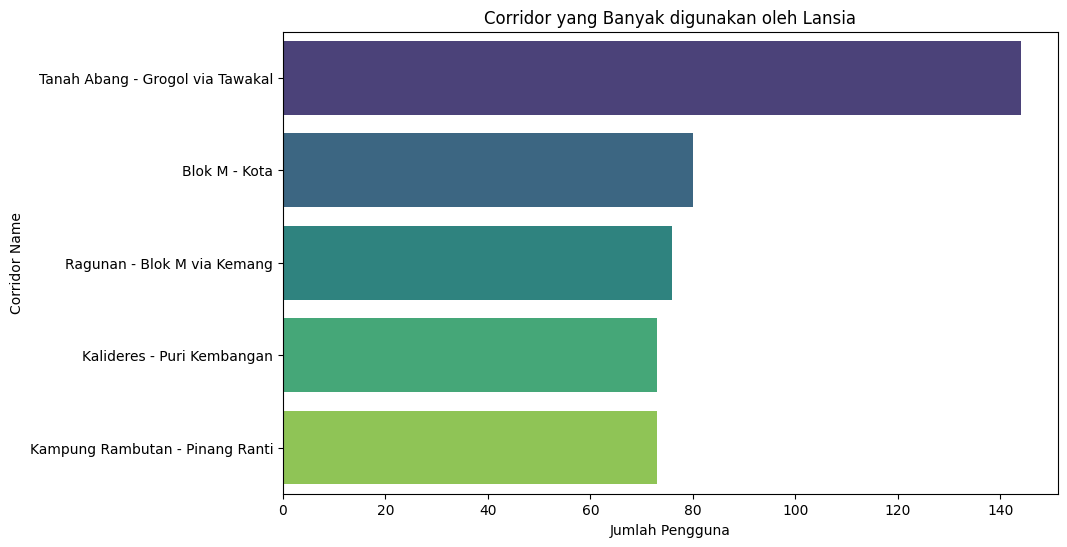

In [217]:
plt.figure(figsize=(10, 6))
sns.barplot(data=topLansia_corridors, y='corridorName', x='count', hue=topLansia_corridors['corridorName'].value_counts().index, palette='viridis')
plt.title('Corridor yang Banyak digunakan oleh Lansia')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Corridor Name')
plt.show()

Untuk meningkatkan fasilitas dan layanan Transjakarta bagi penumpang lansia, evaluasi perlu dilakukan dengan menganalisis pola penggunaan koridor yang sering digunakan oleh kelompok ini. Fokus pada koridor, bukan halte tertentu, bertujuan memastikan pemerataan peningkatan fasilitas di seluruh jalur layanan, bukan hanya di titik-titik tertentu.

Peningkatan fasilitas bagi penumpang lansia tidak hanya mencakup aksesibilitas halte tetapi juga pelayanan informasi trayek, kursi prioritas di dalam bus, dan fasilitas lainnya yang mendukung kenyamanan mereka. Oleh karena itu, pendekatan berbasis koridor dianggap lebih tepat.

> Berdasarkan data, penumpang lansia banyak menggunakan Transjakarta pada koridor Ragunan–Gelora Bung Karno, diikuti oleh beberapa koridor lain yang terlihat pada barchart (koridor yang digunakan oleh penumpang lansia). Dengan demikian, pada periode evaluasi April 2023, lima koridor ini perlu menjadi prioritas utama, terutama jika revitalisasi halte di jalur tersebut belum dilakukan.

### 3. Bagaimana Distribusi Usia dan Gender pengguna terhadap Metode Pembayaran?

In [218]:
pay = tj['payCardBank'].value_counts().reset_index()
pay

,payCardBank,count
0,JakCard,16416
1,e-Money,6066
2,BRIzzi,3119
3,Flazz,2845
4,e-Wallet,2536
5,TapCash,2343


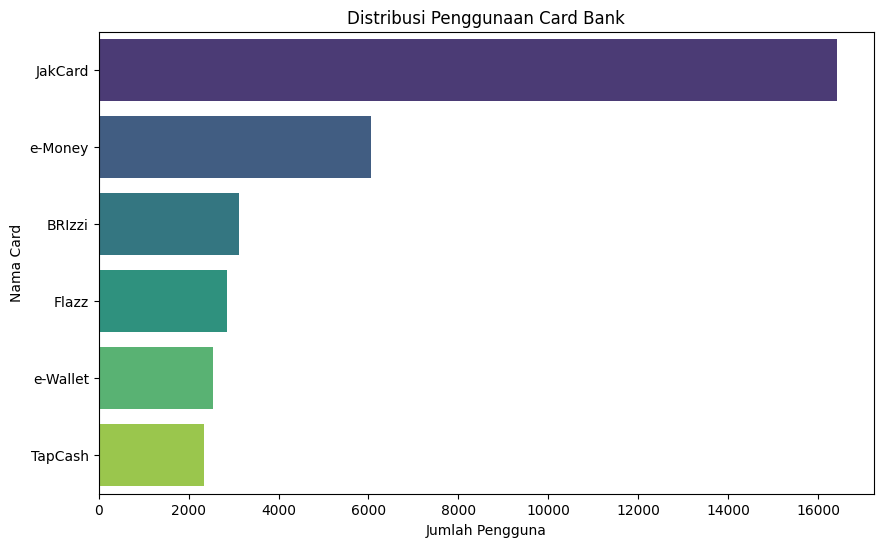

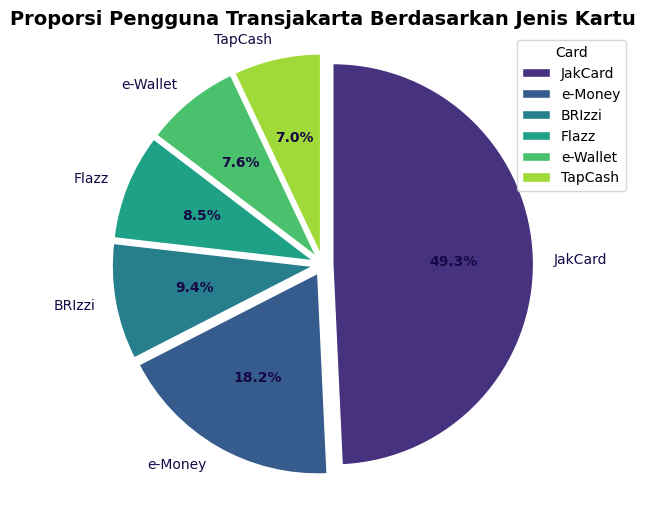

In [219]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pay, y='payCardBank', x='count', hue='payCardBank', palette='viridis', legend=False)
plt.title('Distribusi Penggunaan Card Bank')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Nama Card')
plt.show()


plt.figure(figsize=(8,6))
wedges, texts, autotexts = plt.pie(
    pay['count'],
    labels=pay['payCardBank'],
    autopct='%1.1f%%',
    colors=sns.color_palette('viridis', len(pay)),
    startangle=90,
    counterclock=False,
    explode=[0.05] * len(pay),
    wedgeprops={'linewidth':1, 'edgecolor':'white'},
    textprops={'color':'#170845', 'fontsize':10}
)

for autotext in autotexts:
    autotext.set_fontweight('bold')

plt.axis('equal')
plt.legend(pay['payCardBank'], title="Card", loc='upper right')
plt.title('Proporsi Pengguna Transjakarta Berdasarkan Jenis Kartu', fontsize=14, fontweight='bold')
plt.show()

Menghitung Distribusi pengguna payCardBank berdasarkan Gender

In [220]:
trans_pay = pd.crosstab(index=tj['payCardBank'], columns=tj['payCardSex'])
trans_pay['Total'] = trans_pay.sum(axis=1)
trans_pay.sort_values('Total',ascending=False)

payCardSex,F,M,Total
payCardBank,,,
JakCard,8387,8029,16416
e-Money,3573,2493,6066
BRIzzi,1606,1513,3119
Flazz,1611,1234,2845
e-Wallet,1235,1301,2536
TapCash,1328,1015,2343


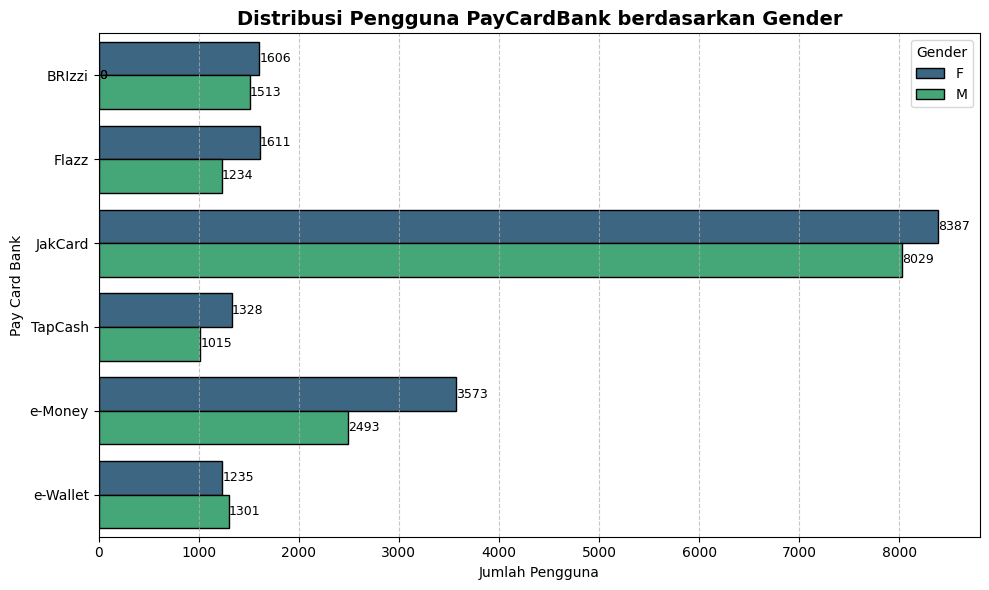

In [221]:
trans_pay_melted = trans_pay.reset_index().melt(
    id_vars='payCardBank',
    value_vars=['F', 'M'],
    var_name='payCardSex',
    value_name='Count'
)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=trans_pay_melted,
    y='payCardBank',
    x='Count',
    hue='payCardSex',
    palette='viridis',
    edgecolor='black'
)

# Tambahkan label jumlah
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}',
                (width, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=9, color='black')

plt.title('Distribusi Pengguna PayCardBank berdasarkan Gender', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Pay Card Bank')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()


Menghitung Distribusi pengguna payCardBank berdasarkan kategori usia dan gender

In [222]:
trans_pay1 = pd.crosstab(index=tj['payCardBank'], columns=[ tj['ageGroup'],tj['payCardSex']])
trans_pay1['Total'] = trans_pay1.sum(axis=1)
trans_pay1.sort_values('Total',ascending=False)

ageGroup    Adult       Child      Senior       Young Adult        Total
payCardSex      F     M     F    M      F     M           F     M       
payCardBank                                                             
JakCard      3660  4142  1347  694  579    1411  2801        1782  16416
e-Money      1651  1057  744   375  126    456   1052        605   6066 
BRIzzi       809   780   195   212  73     207   529         314   3119 
Flazz        743   706   287   97   116    221   465         210   2845 
e-Wallet     667   751   234   143  96     207   238         200   2536 
TapCash      801   483   246   192  35     98    246         242   2343

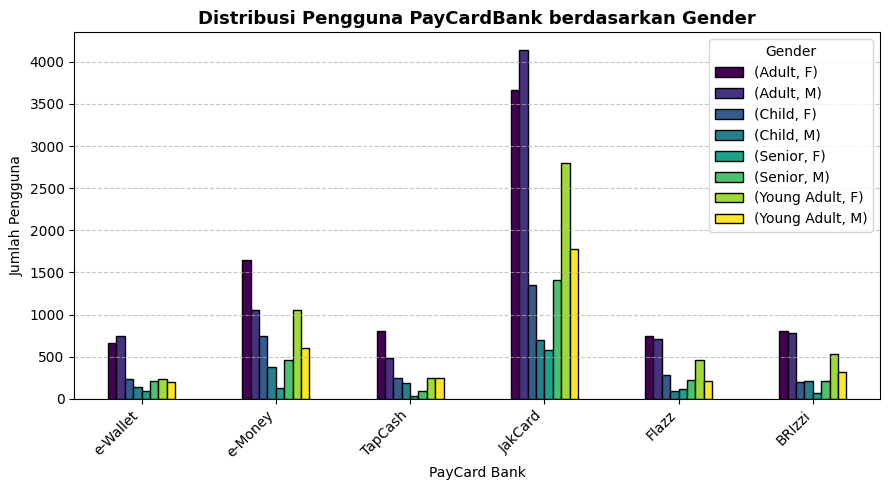

In [223]:
ax = trans_pay1.sort_values(by='payCardBank', ascending=False)\
    .drop(columns='Total')\
    .plot(kind='bar', figsize=(9,5), colormap='viridis', edgecolor='black')

plt.title('Distribusi Pengguna PayCardBank berdasarkan Gender', fontsize=13, fontweight='bold')
plt.xlabel('PayCard Bank')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

Analisis Distribusi Pengguna Berdasarkan Jenis Kartu Pembayaran, Gender, dan Usia :

Berdasarkan grafik dan tabel, terlihat bahwa JakCard merupakan kartu pembayaran dengan jumlah pengguna terbesar, yaitu lebih dari separuh total transaksi. Dominasi ini dapat dimaklumi karena JakCard adalah kartu resmi yang dikeluarkan oleh Pemerintah Provinsi DKI Jakarta dan memang dipromosikan secara luas sebagai media pembayaran utama Transjakarta. Pengguna JakCard didominasi oleh kelompok dewasa baik laki-laki maupun perempuan, sejalan dengan tingginya mobilitas kelompok usia produktif di Jakarta.
Selain JakCard, jenis kartu e-Money menempati urutan kedua, diikuti oleh BRIZZI, Flazz, e-Wallet, dan TapCash. Distribusi ini menunjukkan adanya diversifikasi media pembayaran yang digunakan masyarakat, meskipun volumenya jauh lebih kecil dibandingkan JakCard.

Jika dilihat dari perspektif gender, mayoritas jenis kartu digunakan hampir seimbang oleh laki-laki dan perempuan, meskipun pada kategori tertentu terdapat kecenderungan. Misalnya, pada e-Money dan Flazz, perempuan sedikit lebih dominan dibandingkan laki-laki, sedangkan pada BRIZZI terlihat kecenderungan lebih tinggi digunakan oleh laki-laki.

Ditinjau berdasarkan usia, kelompok dewasa (adult) menjadi segmen pengguna terbesar di hampir semua jenis kartu. Kelompok remaja (young adult) menempati posisi kedua, terutama pada penggunaan JakCard dan e-Money. Sementara kelompok anak-anak (child) dan lansia (senior) tercatat menggunakan layanan dalam jumlah yang jauh lebih kecil. Hal ini konsisten dengan pola mobilitas masyarakat, di mana kelompok usia produktif memiliki frekuensi perjalanan yang lebih tinggi dibandingkan anak-anak maupun lansia.

> Rekomendasi untuk Transjakarta
1. Optimalisasi promosi JakCard
Karena JakCard masih menjadi kartu utama, Transjakarta dapat terus memperluas distribusi dan promosi kartu ini, misalnya dengan menambah titik penjualan/top-up di halte maupun kanal digital.
2. Integrasi dengan e-wallet
Meski jumlah pengguna e-Wallet masih relatif kecil, tren digitalisasi pembayaran terus meningkat. Transjakarta dapat memperkuat kolaborasi dengan penyedia e-Wallet agar lebih praktis digunakan, terutama untuk generasi muda.
3. Segmentasi program loyalitas berdasarkan gender dan usia
Perempuan dewasa/remaja dapat menjadi target utama kampanye kenyamanan dan keamanan perjalanan.
Lansia, meski kecil proporsinya, tetap perlu difasilitasi dengan sistem pembayaran yang mudah digunakan dan fasilitas ramah lansia.
Diversifikasi promosi kartu bank
4. Karena Flazz, BRIZZI, dan TapCash digunakan sebagian kecil masyarakat, Transjakarta bisa menjajaki kerja sama promosi dengan bank penerbit untuk menarik lebih banyak pengguna.

### 4. TREN PENGGUNAAN

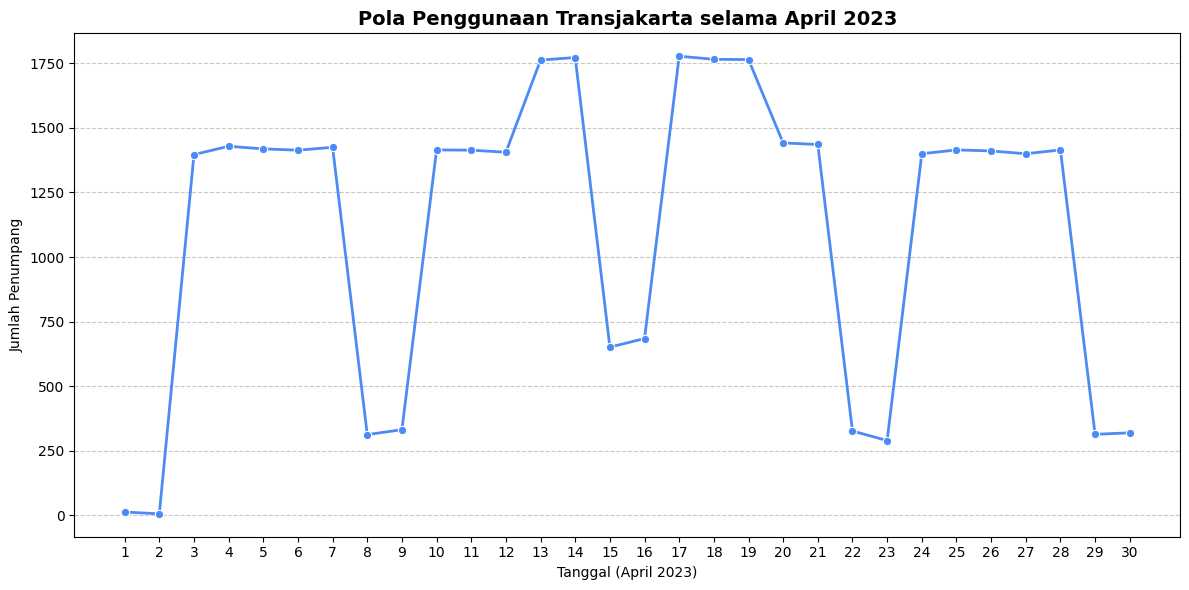

In [224]:
tj['tapInDate'] = tj['tapInTime'].dt.day   # lebih baik pakai .dt.day untuk angka

passenger_count = tj.groupby('tapInDate').size()

plt.figure(figsize=(12, 6))
sns.lineplot(x=passenger_count.index,
             y=passenger_count.values,
             marker='o',
             linewidth=2,
             color='#4C8BF5')

plt.title('Pola Penggunaan Transjakarta selama April 2023', fontsize=14, fontweight='bold')
plt.xlabel('Tanggal (April 2023)')
plt.ylabel('Jumlah Penumpang')
plt.xticks(range(1, passenger_count.index.max()+1))  # biar semua tanggal muncul
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [225]:
tapin_count = tj.groupby('tapInDate').size().reset_index(name='passenger_count')
tapin_count = tapin_count.sort_values(by='passenger_count', ascending=False)
tapin_count.head()

,tapInDate,passenger_count
16,17,1778
13,14,1773
17,18,1766
18,19,1765
12,13,1763


Pada 1 dan 2 April, jumlah pengguna Transjakarta terlihat sangat sedikit, kemungkinan akibat penghapusan data yang mengandung Missing Value selama proses data cleaning.

Terdapat pola kenaikan jumlah pengguna selama lima hari berturut-turut, diikuti penurunan selama dua hari berikutnya, yang mencerminkan pola hari kerja dan akhir pekan. Pengguna cenderung lebih sering menggunakan Transjakarta pada hari kerja, kemungkinan untuk keperluan bekerja, sekolah, atau aktivitas lainnya.

Selama libur Lebaran pada 22 dan 23 April, yang juga jatuh di akhir pekan, terjadi penurunan penggunaan layanan. Pada akhir pekan, rata-rata jumlah pengguna berada di kisaran 400–700 penumpang per hari

TOP CORRIDOR ALL THE WEEK

In [226]:
top_corridor = tj.groupby(['corridorID', 'corridorName']).size().reset_index(name='Count')
top_corridor = top_corridor.sort_values(by='Count', ascending=False).head(5)

top_corridor


,corridorID,corridorName,Count
40,1T,Cibubur - Balai Kota,371
211,S21,Ciputat - CSW,355
194,JIS3,Harmoni - Jakarta International Stadium,317
41,2,Pulo Gadung - Monas,314
118,JAK.06,Kampung Rambutan - Pondok Gede,308


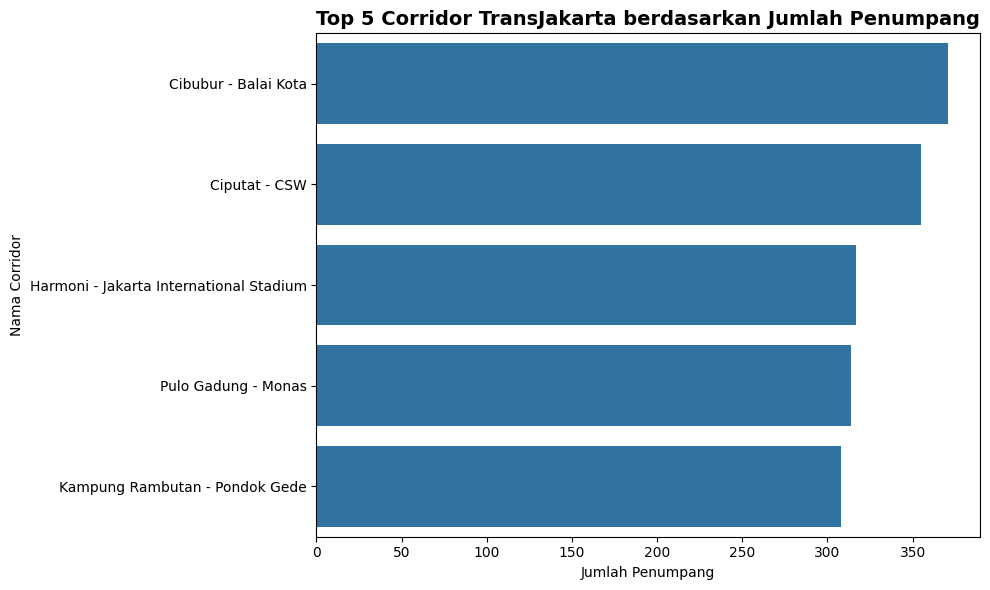

In [227]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_corridor, x='Count', y='corridorName')

plt.title('Top 5 Corridor TransJakarta berdasarkan Jumlah Penumpang', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Nama Corridor')
plt.tight_layout()
plt.show()

In [228]:
import folium
# Data Top Corridor
data = {
    'Corridor': [
        'Cibubur - Balai Kota',
        'Ciputat - CSW',
        'Harmoni - JIS',
        'Pulo Gadung - Monas',
        'Kampung Rambutan - Pondok Gede'
    ],
    'Latitude': [
        -6.3555,
        -6.3095,
        -6.1696,
        -6.1906,
        -6.3173
    ],
    'Longitude': [
        106.9017,
        106.7655,
        106.8219,
        106.9059,
        106.8694
    ]
}

# Convert the data dictionary to a pandas DataFrame
top_corridors_map_df = pd.DataFrame(data)


m = folium.Map(location=[-6.2, 106.82], zoom_start=11)

# Tambahkan marker untuk tiap koridor
for index, row in top_corridors_map_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"<b>{row['Corridor']}</b>",
        tooltip=row['Corridor'],
        icon=folium.Icon(color="blue", icon="bus", prefix="fa")
    ).add_to(m)


# Simpan peta ke file html
m.save("top_corridor_map.html")
m

Hasil Analisis Top 5 Koridor TransJakarta Berdasarkan Jumlah Penumpang
Koridor dengan jumlah penumpang tertinggi adalah
- Cibubur – Balai Kota (371 penumpang) → Menunjukkan jalur ini sangat vital, kemungkinan karena menghubungkan kawasan penyangga (Cibubur) dengan pusat kota (Balai Kota).

- Koridor Ciputat – CSW (355 penumpang) juga menempati posisi tinggi.
→ CSW adalah titik transit besar dengan akses ke MRT, menjadikannya simpul integrasi transportasi.
- Koridor Harmoni – Jakarta International Stadium (317 penumpang) cukup tinggi penggunaannya.
→ Hal ini wajar karena Harmoni merupakan hub besar, sedangkan JIS menarik pengguna pada event atau kegiatan tertentu.
Koridor Pulo Gadung – Monas (314 penumpang) menunjukkan tingginya mobilitas pekerja dari kawasan timur menuju pusat kota.
- Koridor Kampung Rambutan – Pondok Gede (308 penumpang) juga signifikan.
→ Menghubungkan terminal utama dengan kawasan permukiman padat, sehingga wajar jumlah penumpangnya besar.

### Bagaimana Persebaran penggunaan Transjakarta pada jam-jam tertentu sepanjang hari


Weekday VS Weekend

#### WEEKDAY

In [229]:
weekday = tj[tj['dayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
weekday_hourly = weekday.groupby('hour').size().reset_index(name='passenger_count')
weekday_hourly = weekday_hourly.sort_values(by='passenger_count', ascending=False)

weekday_hourly.head()

,hour,passenger_count
14,18,3771
3,7,3331
15,19,3086
2,6,3026
4,8,2324


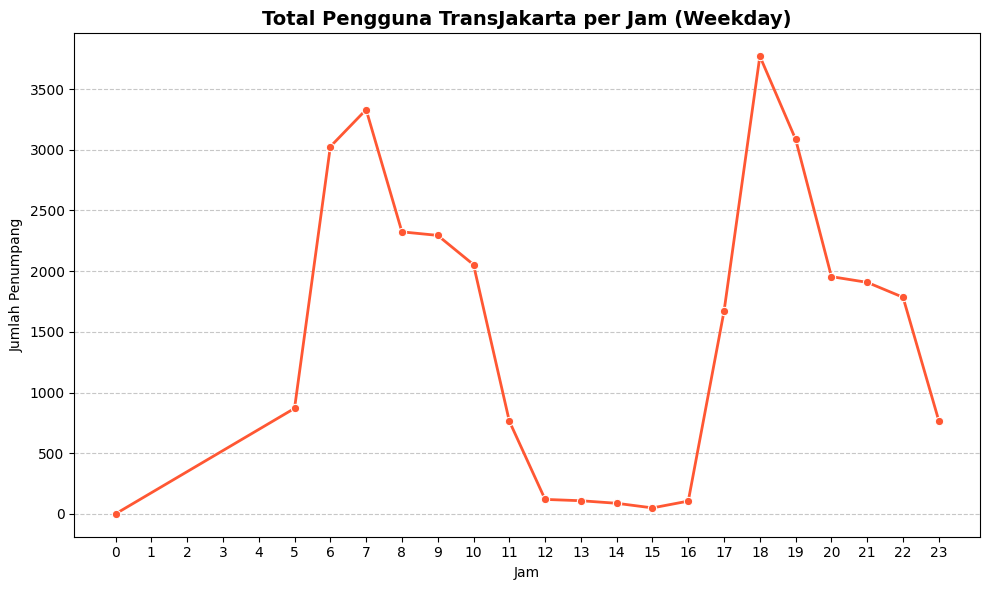

In [230]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=weekday_hourly,
    x='hour',
    y='passenger_count',
    marker='o',
    linewidth=2,
    color='#FF5733'
)

plt.title('Total Pengguna TransJakarta per Jam (Weekday)', fontsize=14, fontweight='bold')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penumpang')
plt.xticks(range(0,24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Analisis Pola Penggunaan per Jam (Weekday)

Dari grafik Total Pengguna TransJakarta per Jam (Weekday) terlihat pola berikut:

- Jam Sibuk Pagi (sekitar 06.00–09.00)
Jumlah penumpang meningkat tajam mulai pukul 05.00, lalu mencapai puncak di pukul 07.00–08.00 dengan lebih dari 3.300 penumpang.
→ Hal ini mencerminkan arus komuter dari daerah tempat tinggal menuju pusat aktivitas (kantor, sekolah, universitas).

- Jam Tenang (11.00–15.00)
Jumlah penumpang turun drastis setelah jam 09.00 dan relatif rendah hingga siang hari.
→ Waktu ini bukan jam utama pergerakan komuter, lebih banyak dipakai untuk perjalanan non-rutin (belanja, urusan pribadi).

- Jam Sibuk Sore (16.00–19.00)
Terjadi lonjakan besar kembali dengan puncak di pukul 18.00 (sekitar 3.700 penumpang, lebih tinggi dari pagi hari).
→ Ini menandakan arus balik pekerja/karyawan ke kawasan hunian di Bodetabek & pinggiran Jakarta.

- Malam (20.00 ke atas)
Setelah pukul 20.00, jumlah penumpang menurun, meskipun masih ada sisa arus perjalanan hingga pukul 22.00–23.00.

> Insight: Pola ini menunjukkan karakteristik sistem transportasi perkotaan:
- Puncak perjalanan pagi hari → pusat kota sebagai tujuan utama.
- Puncak perjalanan sore hari → arus balik ke pemukiman.
- Sore hari lebih padat daripada pagi hari, artinya kapasitas armada sore harus lebih banyak.

In [231]:
top_corridor_weekday = (
    weekday.groupby(['corridorID', 'corridorName'])
    .size()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
    .head(5)
)
top_corridor_weekday

,corridorID,corridorName,Count
40,1T,Cibubur - Balai Kota,363
210,S21,Ciputat - CSW,332
193,JIS3,Harmoni - Jakarta International Stadium,296
117,JAK.06,Kampung Rambutan - Pondok Gede,295
41,2,Pulo Gadung - Monas,294


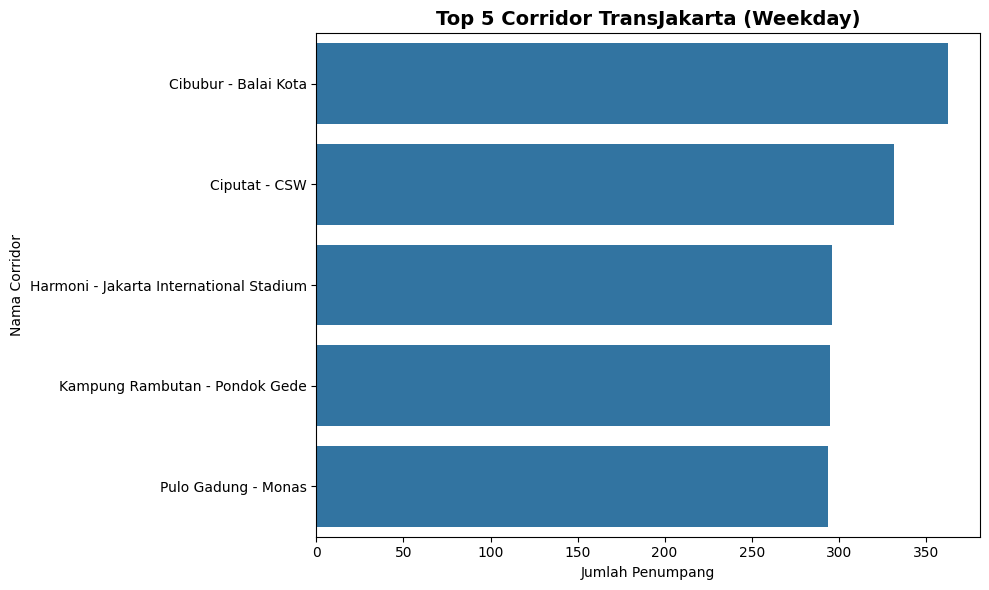

In [232]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_corridor_weekday,
    x='Count',
    y='corridorName'
)

plt.title('Top 5 Corridor TransJakarta (Weekday)', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Nama Corridor')
plt.tight_layout()
plt.show()

Analisis Top 5 Koridor TransJakarta (Weekday)

Berdasarkan tabel & bar chart:

- Cibubur – Balai Kota (363 penumpang)
→ Jalur paling padat, konsisten sebagai koridor utama komuter dari timur (kawasan perumahan padat) ke pusat kota.

- Ciputat – CSW (332 penumpang)
→ Menghubungkan Tangerang Selatan (wilayah penyangga) dengan Jakarta Selatan, wajar tinggi penggunaannya karena banyak pekerja/karyawan.

- Harmoni – Jakarta International Stadium (296 penumpang)
→ Penting karena menghubungkan pusat kota (Harmoni) dengan kawasan rekreasi/event besar.

- Kampung Rambutan – Pondok Gede (295 penumpang)
→ Jalur antar-pemukiman padat di timur Jakarta, dipakai untuk mobilitas lokal maupun transit ke koridor utama.

- Pulo Gadung – Monas (294 penumpang)
→ Jalur dari timur (terminal besar) menuju pusat kota/Monas.

> Insight:
1. Koridor Cibubur – Balai Kota dan Ciputat – CSW menjadi backbone utama perjalanan komuter dari Bodetabek.
2. Pulo Gadung – Monas dan Kampung Rambutan – Pondok Gede menunjukkan tingginya peran terminal besar sebagai simpul transportasi.
3. Harmoni – JIS menandakan adanya diversifikasi tujuan, tidak hanya perkantoran tapi juga area publik/hiburan.

Pola Pengguna Pada Weekend

In [233]:
weekend = tj[tj['dayOfWeek'].isin(['Saturday', 'Sunday'])]
weekend_hourly = weekend.groupby('hour').size().reset_index(name='passenger_count')
weekend_hourly = weekend_hourly.sort_values(by='passenger_count', ascending=False)

weekend_hourly.head()

,hour,passenger_count
15,20,217
14,19,215
16,21,207
2,7,205
12,17,203


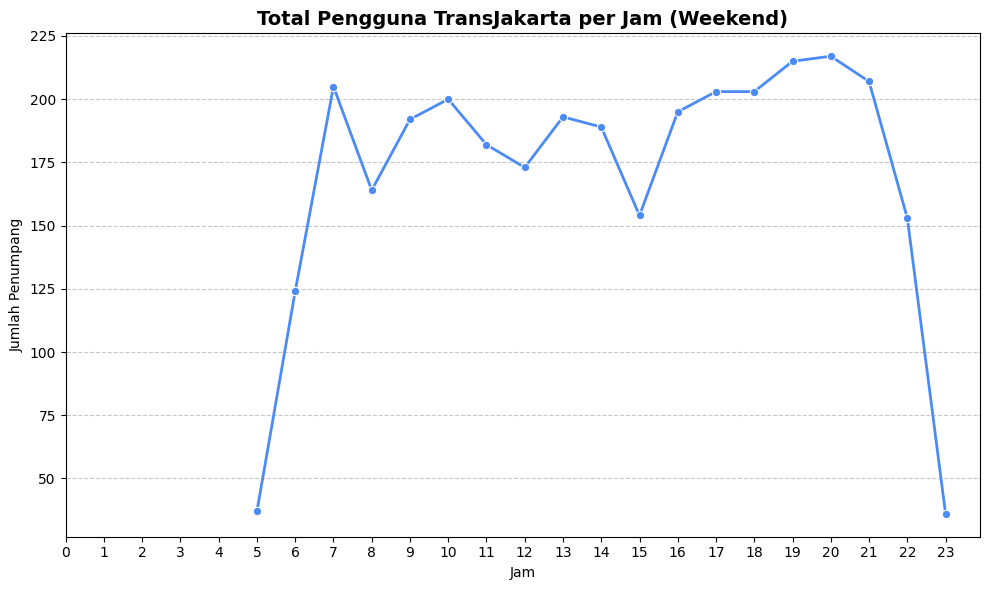

In [234]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=weekend_hourly,
    x='hour',
    y='passenger_count',
    marker='o',
    linewidth=2,
    color='#4C8BF5'
)

plt.title('Total Pengguna TransJakarta per Jam (Weekend)', fontsize=14, fontweight='bold')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penumpang')
plt.xticks(range(0,24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

> Pola Perjalanan per Jam

Berdasarkan data, pola penggunaan TransJakarta di akhir pekan berbeda dengan hari kerja. Tidak ada “morning rush hour” yang dominan, melainkan puncak pergerakan terkonsentrasi di sore–malam.

In [235]:
top_corridor_weekend = (
    weekend.groupby(['corridorID', 'corridorName'])
    .size()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
    .head(5)
)
top_corridor_weekend

,corridorID,corridorName,Count
201,M3,Kalideres - Bundaran HI via Veteran,33
61,5,Matraman Baru - Ancol,29
98,9C,Pinang Ranti - Bundaran Senayan,29
207,M9,Pinang Ranti - Pluit,29
138,JAK.19,Pinang Ranti - Kampung Rambutan,29


/tmp/ipython-input-937701981.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


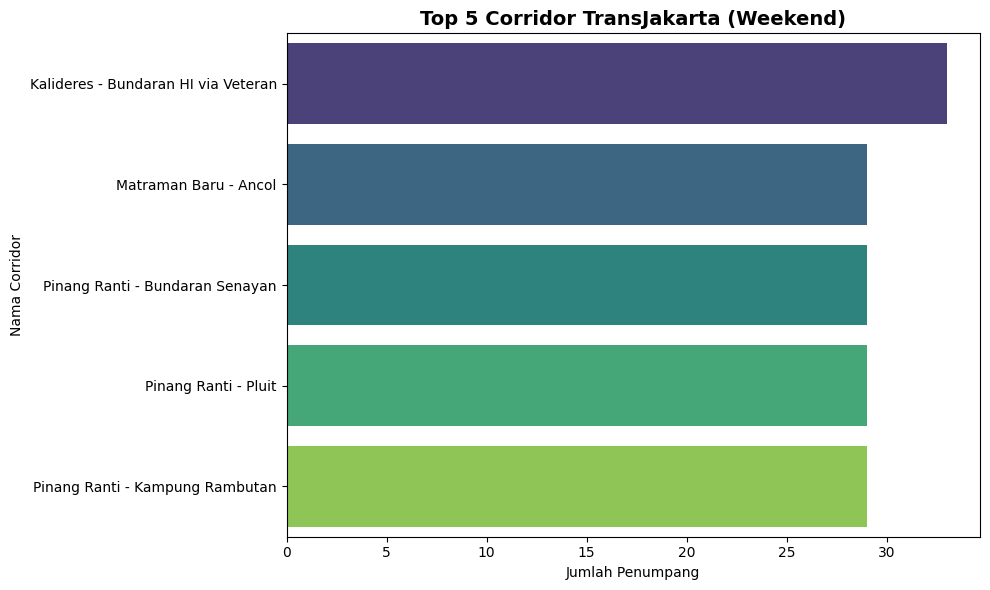

In [236]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_corridor_weekend,
    x='Count',
    y='corridorName',
    palette='viridis'
)

plt.title('Top 5 Corridor TransJakarta (Weekend)', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Nama Corridor')
plt.tight_layout()
plt.show()

Lima koridor dengan jumlah pengguna tertinggi di akhir pekan adalah:

1. Kalideres – Bundaran HI via Veteran (M3)

2. Matraman Baru – Ancol (5)

3. Pinang Ranti – Bundaran Senayan (9C)

4. Pinang Ranti – Pluit (M9)

5. Pinang Ranti – Kampung Rambutan (JAK.19)

> Tidak ada dominasi arus komuter ke pusat kota seperti di weekday; tujuan akhir pekan lebih bervariasi (rekreasi, belanja, wisata, sosial).

> **REKOMENDASI**

- Penyesuaian Pola Armada Weekend

- Alihkan sebagian armada dari jalur komuter rutin ke jalur wisata/populer (misalnya Matraman–Ancol, Bundaran HI).

- Optimasi Jalur Wisata

- Perkuat layanan sore–malam karena puncak pergerakan terjadi pada 16.00–21.00.

- Integrasi dengan Event dan Kawasan Hiburan

- Jalur yang melewati area publik (Ancol, Senayan, Bundaran HI) dapat diberi frekuensi tambahan khusus saat weekend dan hari libur.

### Analisa Koridor  (Cibubur - Balai Kota)

In [237]:
Cibubur = tj[tj['corridorName'] == 'Cibubur - Balai Kota']
Cibubur.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,dayOfWeek,dayType,rushHour,tripDistance,tripDuration,tripDuration_str,birthYear,age,ageGroup,tapInDate
5,DDES630K2F80KC,2251412124634980,JakCard,Tirta Siregar,F,1993,1T,Cibubur - Balai Kota,Go,B00127P,...,Monday,Weekday,Non Peak Hour,0.732289,0 days 00:44:24,00:44:24,1993,30,Adult,3
134,ESJQ990H8Q22LV,345711968178505,e-Money,Kawaya Oktaviani,M,2009,1T,Cibubur - Balai Kota,Back,B00102P,...,Monday,Weekday,Non Peak Hour,3.961347,0 days 00:41:46,00:41:46,2009,14,Child,3
305,ELVF454E9T40AX,2251412124634980,JakCard,Tirta Siregar,F,1993,1T,Cibubur - Balai Kota,Back,B00325P,...,Monday,Weekday,Evening Peak Hour,1.338310,0 days 00:53:03,00:53:03,1993,30,Adult,3
370,BXVS080I7X46TX,3549158005951908,JakCard,"Mustofa Wijayanti, M.Farm",M,1981,1T,Cibubur - Balai Kota,Back,B05773P,...,Monday,Weekday,Evening Peak Hour,0.726943,0 days 01:45:34,01:45:34,1981,42,Adult,3
434,DXGL440B0R80HB,345711968178505,e-Money,Kawaya Oktaviani,M,2009,1T,Cibubur - Balai Kota,Go,B00248P,...,Monday,Weekday,Evening Peak Hour,21.545564,0 days 01:04:50,01:04:50,2009,14,Child,3


In [238]:
gender_cibubur = Cibubur['payCardSex'].value_counts()
gender_cibubur

,count
payCardSex,
M,219
F,152


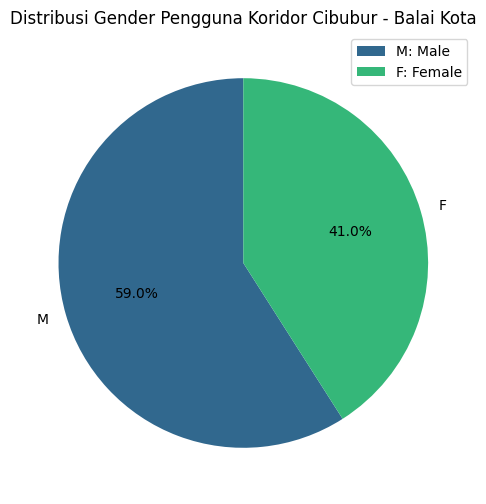

In [239]:
plt.figure(figsize=(6, 6))
gender_cibubur.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(gender_cibubur)))
plt.title('Distribusi Gender Pengguna Koridor Cibubur - Balai Kota')
plt.legend(['M: Male','F: Female'], loc=0)
plt.ylabel('')
plt.show()

Distribusi pengguna Koridor berdasarkan gender menunjukkan bahwa mayoritas pengguna adalah Male dengan presentasi 59.0%, sementara Female sebesar 41.0% dari total pengguna. Ini bisa menjadi indikasi bahwa terdapat perbedaan signifikan dalam preferensi pengguna berdasarkan gender di Koridor 1T.

Berdasarkan Kategori Usia di Cibubur

In [240]:
age_cibubur = Cibubur['ageGroup'].value_counts()
age_cibubur

,count
ageGroup,
Adult,191
Child,108
Young Adult,72


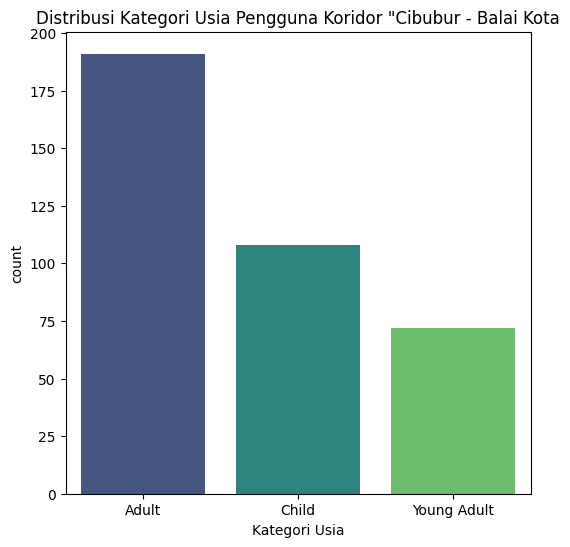

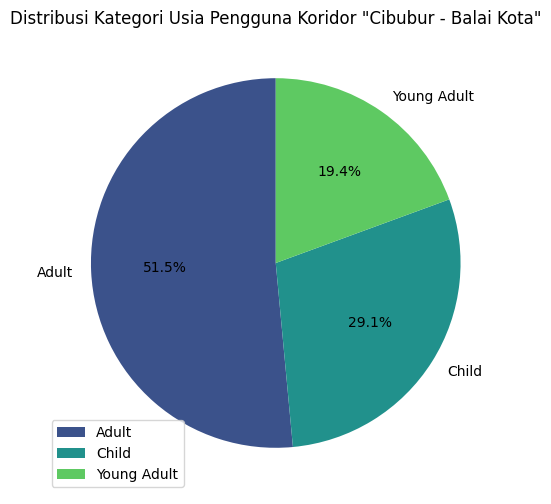

In [241]:
plt.figure(figsize=(6, 6))
sns.countplot(data=Cibubur, x='ageGroup',hue='ageGroup', palette='viridis')
plt.title('Distribusi Kategori Usia Pengguna Koridor "Cibubur - Balai Kota')
plt.xlabel('Kategori Usia')
plt.show()

plt.figure(figsize=(6, 6))
age_cibubur.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(age_cibubur)))
plt.title('Distribusi Kategori Usia Pengguna Koridor "Cibubur - Balai Kota"')
plt.legend(['Adult', 'Child', 'Young Adult'], loc=0)
plt.ylabel('')
plt.show()

> Mayoritas pengguna koridor terdiri dari kelompok usia Adult, mencapai 51.5% dari total pengguna, diikuti oleh Child sebesar 29.1%, dan Young Adult 19.4%.
Data ini mengindikasikan bahwa layanan koridor Transjakarta secara dominan digunakan oleh kelompok usia Adult dan Child

Berdasarkan Gender dan kategori umur Pengguna di Koridor 1T

In [242]:
ageCBB_gender= Cibubur.groupby(['payCardSex', 'ageGroup']).size().reset_index(name='count')
ageCBB_gender

,payCardSex,ageGroup,count
0,F,Adult,77
1,F,Child,37
2,F,Young Adult,38
3,M,Adult,114
4,M,Child,71
5,M,Young Adult,34


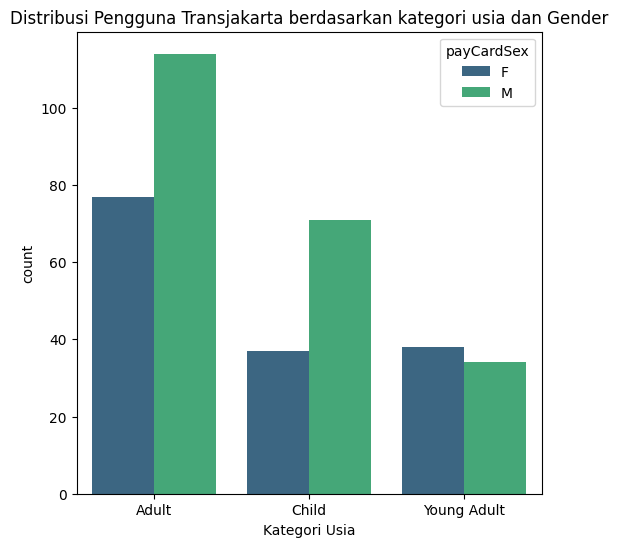

In [243]:
plt.figure(figsize=(6, 6))
sns.countplot(data=Cibubur, x='ageGroup', hue='payCardSex',  palette='viridis')
plt.title('Distribusi Pengguna Transjakarta berdasarkan kategori usia dan Gender')
plt.xlabel('Kategori Usia')
plt.show()

Berdasarkan grafik, Kelompok **adult** dan **child** lebih banyak didominasi **laki-laki(M)**, sementara kelompok **young adult** didominasi perempuan dengan proporsi cukup kecil dibanding kelompok usia lainnya.

Berdasarkan Bank Card yang digunakan

In [244]:
payment_cbb = pd.crosstab(index = Cibubur['payCardBank'], columns = 'count').reset_index().sort_values(by='count', ascending=False)
payment_cbb

col_0,payCardBank,count
1,JakCard,190
2,e-Money,144
0,BRIzzi,37


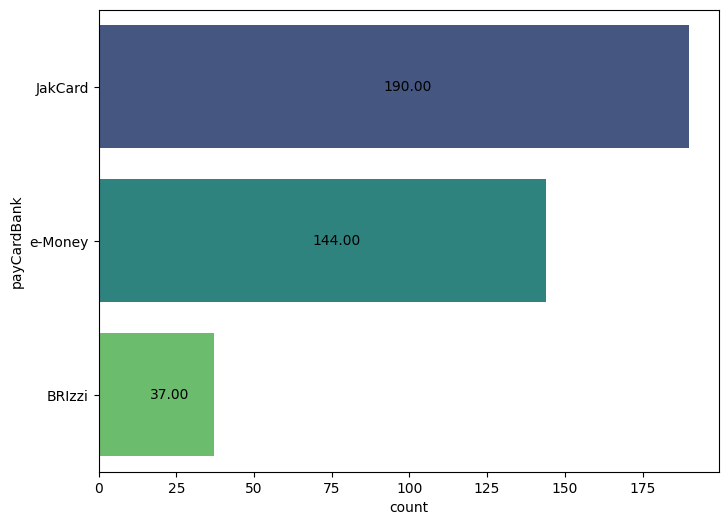

In [245]:
plt.figure(figsize= (8,6))
plots = sns.barplot(data=payment_cbb, y='payCardBank', x='count', hue='payCardBank', palette='viridis')

for bar in plots.patches:
    plots.annotate(format(bar.get_width(), '.2f'),
                   (bar.get_width()/2, bar.get_y() + bar.get_height() / 2),
                   ha='center', va='center',
                   size=10, xytext=(10, 0),
                   textcoords='offset points')

Menghitung Distribusi pengguna payCardBank berdasarkan kategori Gender

In [246]:
gender_pay_cbb = pd.crosstab(index=Cibubur['payCardBank'], columns=Cibubur['payCardSex'])
gender_pay_cbb['Total'] = gender_pay_cbb.sum(axis=1)
gender_pay_cbb.sort_values('Total',ascending=False)

payCardSex,F,M,Total
payCardBank,,,
JakCard,76,114,190
e-Money,75,69,144
BRIzzi,1,36,37


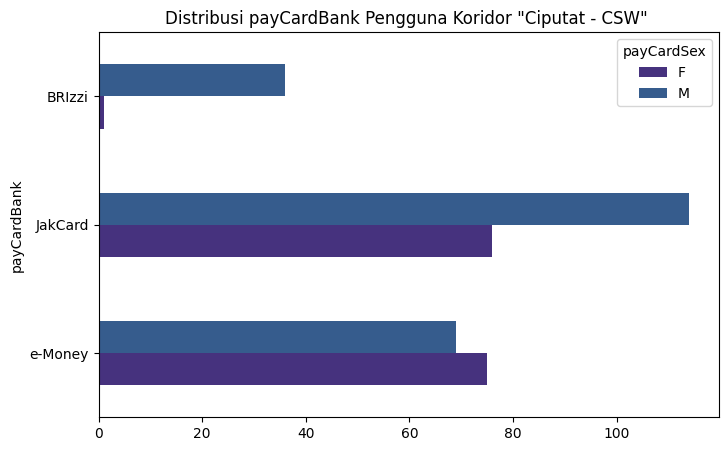

In [247]:
sns.set_palette("viridis")
gender_pay_cbb.sort_values(by='payCardBank', ascending=False).drop(columns='Total').plot(kind='barh', figsize=(8,5),
title='Distribusi payCardBank Pengguna Koridor "Ciputat - CSW" ')
plt.show()

1. Kartu JakCard : Total pengguna sebanyak 190 orang, dengan mayoritas pengguna adalah male (114 orang), sementara female berjumlah 76 orang.
2. e-Money: Total pengguna mencapai 144 orang, dengan distribusi yang didominasi oleh female (75 orang) dan male (69 orang).
3. BRIzzi: Total pengguna berjumlah 37 orang, 36 orang male dan 1 orang female

Menghitung Distribusi pengguna payCardBank berdasarkan kategori usia

In [248]:
pay_gender_cbb = pd.crosstab(index=Cibubur['payCardBank'], columns=Cibubur['ageGroup'])
pay_gender_cbb['Total'] = pay_gender_cbb.sum(axis=1)
pay_gender_cbb.sort_values('Total',ascending=False)

ageGroup,Adult,Child,Young Adult,Total
payCardBank,,,,
JakCard,188,1,1,190
e-Money,1,72,71,144
BRIzzi,2,35,0,37


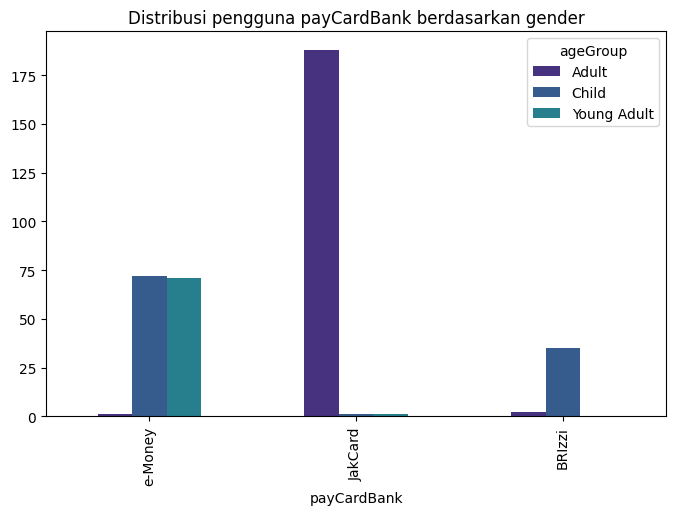

In [249]:
pay_gender_cbb.sort_values(by='payCardBank', ascending=False).drop(columns='Total').plot(kind='bar', figsize=(8,5),
title='Distribusi pengguna payCardBank berdasarkan gender')
plt.show()

In [250]:
payGender_ageCBB = pd.crosstab(index=Cibubur['payCardBank'], columns=[ Cibubur['ageGroup'],Cibubur['payCardSex']])
payGender_ageCBB['Total'] = payGender_ageCBB.sum(axis=1)
payGender_ageCBB.sort_values('Total',ascending=False)

ageGroup    Adult      Child     Young Adult     Total
payCardSex      F    M     F   M           F   M      
payCardBank                                           
JakCard      75    113  1     0   0           1   190 
e-Money      1     0    36    36  38          33  144 
BRIzzi       1     1    0     35  0           0   37

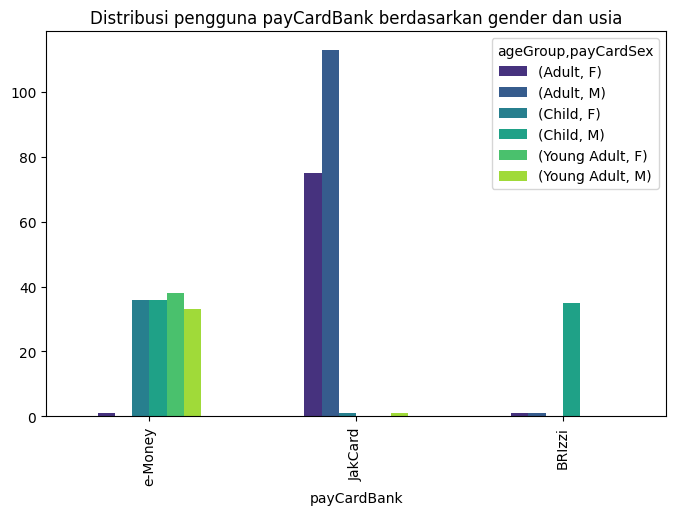

In [251]:
payGender_ageCBB.sort_values(by='payCardBank', ascending=False).drop(columns='Total').plot(kind='bar', figsize=(8,5),
title='Distribusi pengguna payCardBank berdasarkan gender dan usia')
plt.show()

Kategori Adult mendominasi semua jenis kartu, dengan pengguna kartu "JakCard" mencapai puncak tertinggi. Kesempatan Pengembangan Segmen anak-anak dapat diakses secara tidak langsung melalui orang tua mereka, misalnya dengan menawarkan kartu yang memungkinkan orang tua mengontrol transaksi anak, bangku khusus yang membawa anak

Distribusi pengguna saat Weekday & Weekend

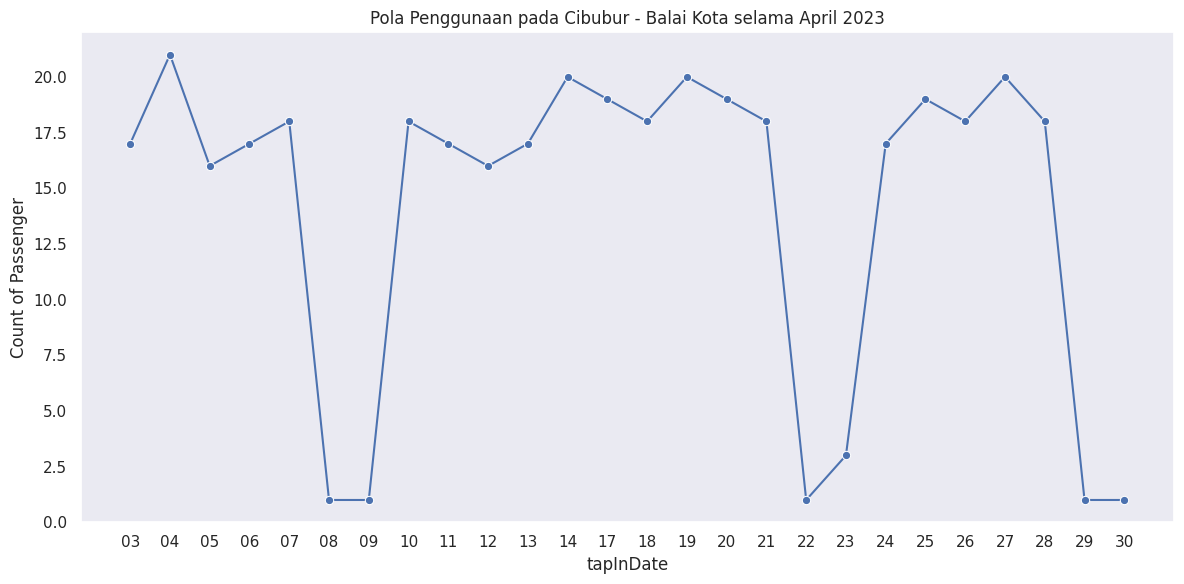

In [252]:
Cibubur = Cibubur.copy()   # buat salinan biar aman
Cibubur['tapInDate'] = Cibubur['tapInTime'].dt.strftime('%d')

passenger_count = Cibubur.groupby('tapInDate').size()

sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x=passenger_count.index, y=passenger_count.values, marker='o')
plt.ylabel('Count of Passenger')
plt.title('Pola Penggunaan pada Cibubur - Balai Kota selama April 2023')
plt.tight_layout()
plt.grid(False)
plt.show()

- Polanya Fluktuatif:
Grafik menunjukkan pola naik turun yang teratur setiap pekan. Terdapat kenaikan jumlah penumpang selama 5 hari kerja (weekday) diikuti dengan penurunan yang tajam selama 2 hari (weekend).
Hal ini mencerminkan preferensi masyarakat yang lebih sering menggunakan Transjakarta pada hari kerja, kemungkinan besar untuk aktivitas seperti bekerja atau sekolah.
- Penurunan Ekstrem pada Tanggal 7-9, 16, 22-23, dan 29-30 April:
Penurunan jumlah pengguna pada tanggal-tanggal ini kemungkinan disebabkan oleh akhir pekan, hari libur, atau ada data yang tidak lengkap akibat proses pembersihan (data cleaning) sebelumnya.
- Peningkatan Puncak pada Hari Kerja:
Jumlah penumpang mencapai puncaknya selama hari kerja (weekday), yang terlihat pada siklus mingguan grafik.
- Libur Lebaran pada Tanggal 22-23 April:
Penurunan penggunaan pada tanggal tersebut dapat dikaitkan dengan libur Lebaran yang kebetulan jatuh pada akhir pekan. Saat libur Lebaran, banyak warga Jakarta yang mudik sehingga jumlah pengguna Transjakarta menurun drastis.
- Pengguna Konsisten Selama Weekday:
Jumlah penumpang selama weekday stabil, yang mencerminkan bahwa layanan Transjakarta tetap menjadi pilihan utama masyarakat untuk aktivitas harian.

> Pola penggunaan ini mencerminkan bahwa layanan Transjakarta lebih dimanfaatkan saat hari kerja untuk aktivitas rutin.
Analisis ini dapat menjadi dasar evaluasi bagi operator Transjakarta untuk menyesuaikan jumlah armada pada hari kerja dan akhir pekan agar lebih efisien.
Selain itu, evaluasi tambahan diperlukan untuk memahami lebih lanjut mengenai rendahnya penggunaan pada beberapa tanggal tertentu.

Weekday

In [254]:
weekday_cbb = Cibubur[Cibubur['dayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
weekday_hourlyCBB = weekday_cbb .groupby('hour').size().reset_index(name='passenger_count')
weekday_hourlyCBB = weekday_hourlyCBB.sort_values(by='passenger_count', ascending=False)

weekday_hourlyCBB.head()

,hour,passenger_count
10,19,41
9,18,41
2,7,35
4,9,35
1,6,32


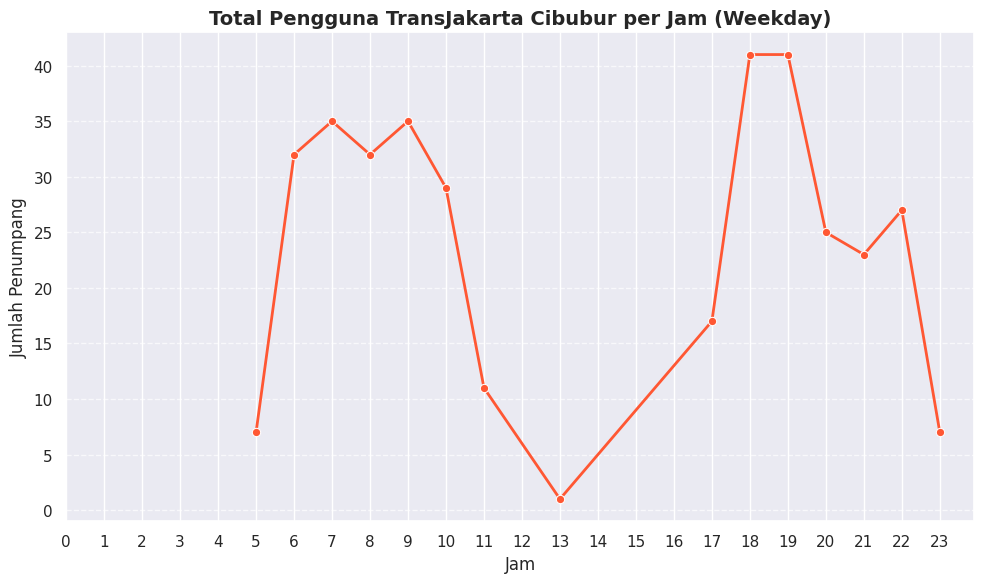

In [256]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=weekday_hourlyCBB,
    x='hour',
    y='passenger_count',
    marker='o',
    linewidth=2,
    color='#FF5733'
)

plt.title('Total Pengguna TransJakarta Cibubur per Jam (Weekday)', fontsize=14, fontweight='bold')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penumpang')
plt.xticks(range(0,24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Berdasarkan line-chart yang ditampilkan:
 1. **Pola Waktu Penggunaan**
   - **Morning Peak Hours (06:00-09:00):**
     - Terdapat lonjakan penggunaan antara pukul 06:00 hingga 08:00 setiap hari kerja, dengan puncak tertinggi pada pukul 07:00-08:00.
     - Pola ini menunjukkan bahwa banyak pengguna memanfaatkan Transjakarta untuk perjalanan ke tempat kerja atau sekolah pada pagi hari.

   - **Evening Peak Hours (16:00-18:00):**
     - Lonjakan kedua terlihat pada pukul 16:00 hingga 17:00, dengan puncak tertinggi pada pukul 17:00.
     - Hal ini menunjukkan aktivitas pulang kerja atau sekolah.
2. **Distribusi Penggunaan Berdasarkan Hari**
   - Penggunaan pada hari kerja relatif stabil, dengan jumlah pengguna tertinggi pada hari Rabu (terutama pukul 17:00 dengan nilai 16).
   - Penggunaan sedikit menurun pada hari Kamis dan Jumat, tetapi pola puncak waktu tetap sama.
3. **Penurunan pada Jam Tengah Hari**
   - Pada pukul 10:00 hingga 15:00, penggunaan terlihat menurun secara konsisten, mencerminkan jam non-aktif atau waktu istirahat kerja.
4. **Insight Tambahan**
   - **Rabu** adalah hari dengan intensitas penggunaan tertinggi, baik di pagi maupun sore hari. Hal ini dapat menunjukkan aktivitas rutin masyarakat pada pertengahan minggu lebih tinggi.
   - Penggunaan menurun drastis setelah pukul 19:00, yang mencerminkan penurunan mobilitas masyarakat pada malam hari.

**Kesimpulan**
- Waktu puncak penggunaan Transjakarta terjadi pada jam keberangkatan kerja/sekolah (06:00-08:00) dan jam pulang kerja/sekolah (16:00-17:00).
- Hari kerja menunjukkan pola penggunaan yang stabil, dengan puncak tertinggi pada hari Rabu.
- Analisis ini dapat membantu operator Transjakarta untuk mengoptimalkan jadwal operasional armada di waktu-waktu puncak dan merencanakan pengelolaan sumber daya secara lebih efisien.

In [258]:
cbb_weekends = Cibubur[Cibubur['dayOfWeek'].isin(['Saturday', 'Sunday'])]

weekend_hourlyCBB = cbb_weekends .groupby('hour').size().reset_index(name='passenger_count')
weekend_hourlyCBB = weekend_hourlyCBB.sort_values(by='passenger_count', ascending=False)
weekend_hourlyCBB.head()

,hour,passenger_count
1,7,3
0,6,1
2,12,1
3,13,1
4,16,1


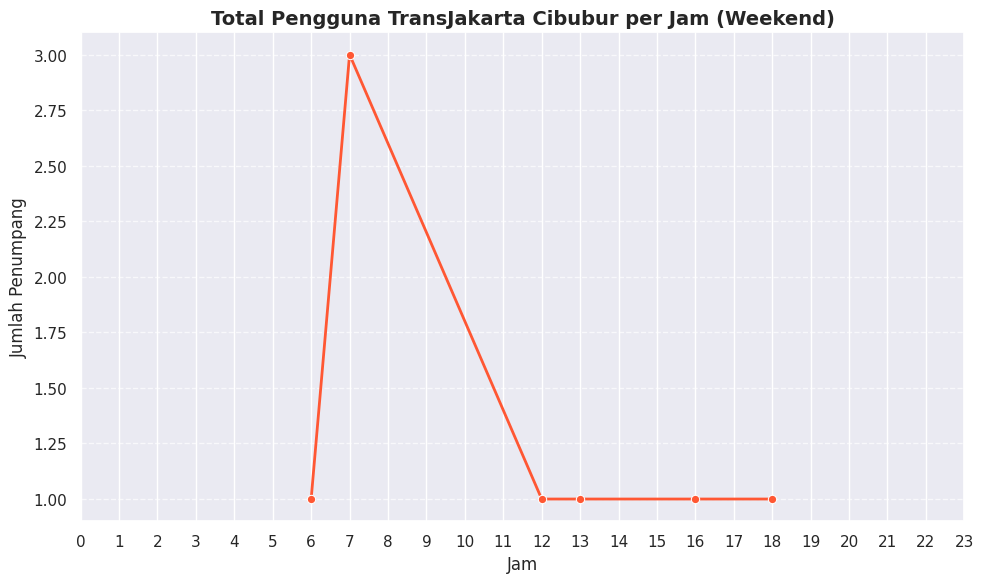

In [259]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=weekend_hourlyCBB,
    x='hour',
    y='passenger_count',
    marker='o',
    linewidth=2,
    color='#FF5733'
)

plt.title('Total Pengguna TransJakarta Cibubur per Jam (Weekend)', fontsize=14, fontweight='bold')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penumpang')
plt.xticks(range(0,24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Rekap Weekend pada Cibubur - Balai Kotan menegaskan: 07:00 tertinggi (3 transaksi); jam 6, 12, 13, 16, 18 masing-masing 1 transaksi

## **Kesimpulan & Rekomendasi**

Berdasarkan hasil analisis terhadap data penggunaan TransJakarta, terlihat bahwa layanan ini memiliki dinamika yang sangat dipengaruhi oleh **gender, usia, waktu perjalanan, serta koridor yang digunakan**. Dari pola tersebut, terdapat beberapa temuan utama yang bisa menjadi dasar rekomendasi strategis.

Pertama, dari sisi **gender**, pengguna perempuan sedikit lebih dominan dibanding laki-laki. Hal ini menunjukkan pentingnya menjaga aspek keamanan dan kenyamanan, terutama di koridor yang didominasi perempuan seperti **Pasar Minggu – Tanah Abang**. Keberadaan bus khusus wanita, CCTV di halte, serta penempatan petugas di titik-titik rawan menjadi langkah penting untuk mempertahankan dan meningkatkan kepercayaan penumpang perempuan. Sementara itu, koridor dengan dominasi pria seperti **Cibubur – Balai Kota** lebih membutuhkan peningkatan kapasitas armada agar perjalanan menjadi lebih efisien.

Kedua, jika dilihat dari **usia penumpang**, kelompok **dewasa (adult)** menjadi pengguna terbesar. Artinya, jam sibuk pagi dan sore di hari kerja harus tetap menjadi prioritas dengan menambah armada, khususnya di jalur komuter utama seperti **Cibubur – Balai Kota** dan **Ciputat – CSW**. Kelompok **remaja (young adult)** yang cukup besar juga menunjukkan bahwa integrasi layanan dengan sekolah dan kampus perlu dioptimalkan, misalnya melalui promo tarif pelajar. Sedangkan untuk **lansia**, meski jumlahnya lebih sedikit, layanan ramah lansia perlu diperhatikan di jalur tertentu seperti **Ragunan – GBK**, misalnya dengan halte ramah disabilitas, kursi prioritas, serta jalur landai.

Ketiga, dari segi **pola waktu**, terlihat bahwa penggunaan TransJakarta di hari kerja jauh lebih tinggi dibanding akhir pekan. Puncak kepadatan terjadi pada jam **07.00 pagi** dan **17.00 sore**, terutama di hari **Rabu**. Hal ini menandakan perlunya penambahan armada pada jam sibuk untuk mengurangi antrean panjang dan meningkatkan kepuasan pengguna. Sebaliknya, di akhir pekan, pola perjalanan lebih banyak mengarah ke lokasi rekreasi dan wisata, sehingga armada bisa digeser ke jalur **Kalideres – Bundaran HI, Matraman – Ancol, dan Pinang Ranti – Pluit**.

Keempat, jika melihat **koridor dengan jumlah penumpang tertinggi**, seperti **Cibubur – Balai Kota, Ciputat – CSW, dan Harmoni – JIS**, dapat disimpulkan bahwa jalur-jalur komuter masih menjadi tulang punggung utama layanan TransJakarta. Oleh karena itu, strategi pengelolaan armada perlu lebih fokus pada jalur ini di jam sibuk. Namun demikian, jalur yang lebih berorientasi pada kegiatan sosial dan wisata tidak boleh diabaikan, terutama pada akhir pekan.

Kelima, dari sisi **media pembayaran**, penggunaan **JakCard** masih mendominasi. Namun, generasi muda sudah mulai banyak menggunakan e-wallet. Oleh karena itu, perluasan kanal top-up JakCard dan integrasi lebih erat dengan e-wallet bisa menjadi strategi untuk meningkatkan kenyamanan. Selain itu, kerja sama dengan bank penerbit kartu seperti Flazz, BRIZZI, atau TapCash dapat dijadikan peluang promosi berbasis segmen usia dan gender.

Secara khusus, pada koridor **Cibubur – Balai Kota** yang menjadi jalur paling ramai, mayoritas pengguna adalah **laki-laki dewasa dan anak-anak** dengan penggunaan kartu JakCard dan e-Money yang dominan. Pola perjalanan di jalur ini sangat jelas: penuh pada jam berangkat kerja/sekolah dan sore hari saat pulang. Oleh karena itu, penambahan bus berkapasitas besar (misalnya bus gandeng/double decker) pada jam sibuk serta promosi kartu bank tertentu dapat menjadi strategi efektif.

Dengan temuan-temuan tersebut, dapat disimpulkan bahwa strategi pengelolaan TransJakarta ke depan sebaiknya berfokus pada **tiga hal utama**:

1. **Optimalisasi armada berbasis waktu dan koridor**, dengan fokus pada jalur komuter saat weekday dan jalur rekreasi saat weekend.
2. **Peningkatan keamanan dan kenyamanan bagi perempuan serta aksesibilitas ramah lansia** untuk menjangkau semua segmen penumpang.
3. **Integrasi media pembayaran dan promosi kartu** untuk menarik pengguna baru dan meningkatkan loyalitas pelanggan.

Melalui penerapan strategi ini, TransJakarta berpotensi tidak hanya menjadi moda transportasi pilihan utama bagi masyarakat, tetapi juga memberikan pengalaman perjalanan yang lebih aman, nyaman, dan inklusif bagi semua lapisan pengguna.


In [ ]:
tj.to_csv("transjakarta_clean.csv", index=False)